## 1. Configuración e Importación

In [1]:
# Importar librerías necesarias
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from datetime import datetime

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
warnings.filterwarnings('ignore')

# Agregar src al path para imports
project_root = Path().cwd().parent
src_path = project_root / 'src'
sys.path.append(str(src_path))

print(f"📁 Directorio del proyecto: {project_root}")
print(f"🐍 Versión de Python: {sys.version}")
print(f"📊 Versión de Pandas: {pd.__version__}")
print(f"🔢 Versión de NumPy: {np.__version__}")

📁 Directorio del proyecto: d:\VSCode\nyc_taxi_project
🐍 Versión de Python: 3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]
📊 Versión de Pandas: 2.3.3
🔢 Versión de NumPy: 2.3.5


## 2. Importación del Feature Engineer

In [2]:
# Importar el feature engineer y configuración
from data.features import TaxiFeatureEngineer
from config.paths import PROCESSED_DATA, FEATURE_DATA

# Verificar rutas de archivos
print("📂 CONFIGURACIÓN DE RUTAS:")
print(f"   Datos procesados (entrada): {PROCESSED_DATA}")
print(f"   Datos con features (salida): {FEATURE_DATA}")
print(f"   Existe archivo procesado: {Path(PROCESSED_DATA).exists()}")

if not Path(PROCESSED_DATA).exists():
    print("\n⚠️  ADVERTENCIA: Archivo de datos procesados no encontrado!")
    print("   Ejecute primero el notebook 02_preprocessing_pipeline.ipynb")
    print("   O ejecute el script preprocess.py")
else:
    file_size = Path(PROCESSED_DATA).stat().st_size / 1024**2
    print(f"   Tamaño del archivo: {file_size:.2f} MB")

# Inicializar feature engineer
feature_engineer = TaxiFeatureEngineer()
print(f"\n✅ TaxiFeatureEngineer inicializado correctamente")

2025-11-28 19:24:22,056 - nyc_taxi_logger - INFO - TaxiFeatureEngineer inicializado


📂 CONFIGURACIÓN DE RUTAS:
   Datos procesados (entrada): d:\VSCode\nyc_taxi_project\data\processed\processed_data.parquet
   Datos con features (salida): d:\VSCode\nyc_taxi_project\data\processed\feature_data.parquet
   Existe archivo procesado: True
   Tamaño del archivo: 39.69 MB

✅ TaxiFeatureEngineer inicializado correctamente


## 3. Carga de Datos Procesados

In [3]:
# Cargar datos procesados/limpios
print("📥 CARGANDO DATOS PROCESADOS...")
print("="*50)

data = feature_engineer.load_processed_data()

print(f"\n📊 INFORMACIÓN DEL DATASET LIMPIO:")
print(f"   Forma: {data.shape}")
print(f"   Tamaño en memoria: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   Columnas disponibles: {len(data.columns)}")

print(f"\n🔍 COLUMNAS DISPONIBLES:")
for i, col in enumerate(data.columns, 1):
    print(f"   {i:2d}. {col:<25} ({data[col].dtype})")

print(f"\n🔍 PRIMEROS 3 REGISTROS:")
display(data.head(3))

print(f"\n📈 ESTADÍSTICAS BÁSICAS DE CAMPOS NUMÉRICOS:")
numeric_cols = data.select_dtypes(include=[np.number]).columns
display(data[numeric_cols].describe().round(2))

2025-11-28 19:24:22,083 - nyc_taxi_logger - INFO - Cargando datos procesados desde: d:\VSCode\nyc_taxi_project\data\processed\processed_data.parquet


📥 CARGANDO DATOS PROCESADOS...


2025-11-28 19:24:23,102 - nyc_taxi_logger - INFO - Datos cargados: 2,704,171 filas, 20 columnas



📊 INFORMACIÓN DEL DATASET LIMPIO:
   Forma: (2704171, 20)
   Tamaño en memoria: 541.57 MB
   Columnas disponibles: 20

🔍 COLUMNAS DISPONIBLES:
    1. VendorID                  (int64)
    2. tpep_pickup_datetime      (datetime64[us])
    3. tpep_dropoff_datetime     (datetime64[us])
    4. passenger_count           (float64)
    5. trip_distance             (float64)
    6. RatecodeID                (float64)
    7. store_and_fwd_flag        (object)
    8. PULocationID              (int64)
    9. DOLocationID              (int64)
   10. payment_type              (int64)
   11. fare_amount               (float64)
   12. extra                     (float64)
   13. mta_tax                   (float64)
   14. tip_amount                (float64)
   15. tolls_amount              (float64)
   16. improvement_surcharge     (float64)
   17. total_amount              (float64)
   18. congestion_surcharge      (float64)
   19. airport_fee               (float64)
   20. trip_duration_minutes     (

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration_minutes
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,17.0,3.0,0.5,0.0,0.0,0.3,23.3,2.5,0.0,18.700000
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,11.0,3.0,0.5,0.0,0.0,0.3,17.3,2.5,0.0,13.816667
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,15.5,3.0,0.5,0.0,0.0,0.3,21.8,2.5,0.0,15.366667



📈 ESTADÍSTICAS BÁSICAS DE CAMPOS NUMÉRICOS:


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration_minutes
count,2704171.00,2704171.00,2704171.00,2704171.00,2704171.00,2704171.00,2704171.00,2704171.00,2704171.00,2704171.00,2704171.00,2704171.00,2704171.0,2704171.00,2704171.00,2704171.00,2704171.00
mean,1.71,1.42,1.95,1.09,167.69,166.25,1.21,9.88,1.03,0.50,1.95,0.01,0.3,16.09,2.41,0.01,11.77
std,0.45,0.94,1.24,2.88,66.26,68.84,0.42,4.11,1.18,0.01,1.40,0.23,0.0,4.97,0.47,0.12,6.10
min,1.00,1.00,0.01,1.00,1.00,1.00,1.00,0.01,0.00,0.00,0.00,0.00,0.0,1.30,0.00,0.00,1.00
25%,1.00,1.00,1.05,1.00,125.00,114.00,1.00,6.50,0.00,0.50,1.00,0.00,0.3,12.36,2.50,0.00,6.97
50%,2.00,1.00,1.63,1.00,163.00,163.00,1.00,9.00,0.50,0.50,2.00,0.00,0.3,15.36,2.50,0.00,10.78
75%,2.00,1.00,2.50,1.00,236.00,236.00,1.00,12.50,2.50,0.50,2.95,0.00,0.3,19.13,2.50,0.00,15.72
max,2.00,6.00,7.43,99.00,265.00,265.00,4.00,23.20,8.30,3.30,5.90,21.00,0.3,30.83,2.50,1.25,29.42


## 4. Etapa 1: Características Temporales

2025-11-28 19:24:26,724 - nyc_taxi_logger - INFO - Creando características temporales...


🕒 CREANDO CARACTERÍSTICAS TEMPORALES

📊 Columnas antes: 20


2025-11-28 19:24:29,157 - nyc_taxi_logger - INFO - Características temporales creadas



✅ CARACTERÍSTICAS TEMPORALES CREADAS:
   Columnas nuevas: 15
   Total columnas: 35

🔍 CARACTERÍSTICAS TEMPORALES CREADAS (15):
    1. tpep_pickup_datetime      - Ejemplos: {Timestamp('2022-05-11 18:50:10'): np.int64(12), Timestamp('2022-05-16 18:07:58'): np.int64(11), Timestamp('2022-05-26 19:57:33'): np.int64(10)}
    2. tpep_dropoff_datetime     - Ejemplos: {Timestamp('2022-05-10 18:41:22'): np.int64(11), Timestamp('2022-05-20 11:41:12'): np.int64(10), Timestamp('2022-05-11 14:17:46'): np.int64(10)}
    3. trip_duration_minutes     - Ejemplos: {8.866666666666667: np.int64(3377), 8.533333333333333: np.int64(3300), 9.033333333333333: np.int64(3296)}
    4. pickup_hour               - Ejemplos: {18: np.int64(198283), 19: np.int64(183979), 17: np.int64(178956)}
    5. pickup_day_of_week        - Ejemplos: {1: np.int64(455236), 3: np.int64(389520), 0: np.int64(383583)}
    6. pickup_day                - Ejemplos: {12: np.int64(101957), 5: np.int64(100999), 11: np.int64(98584)}
    7. is_

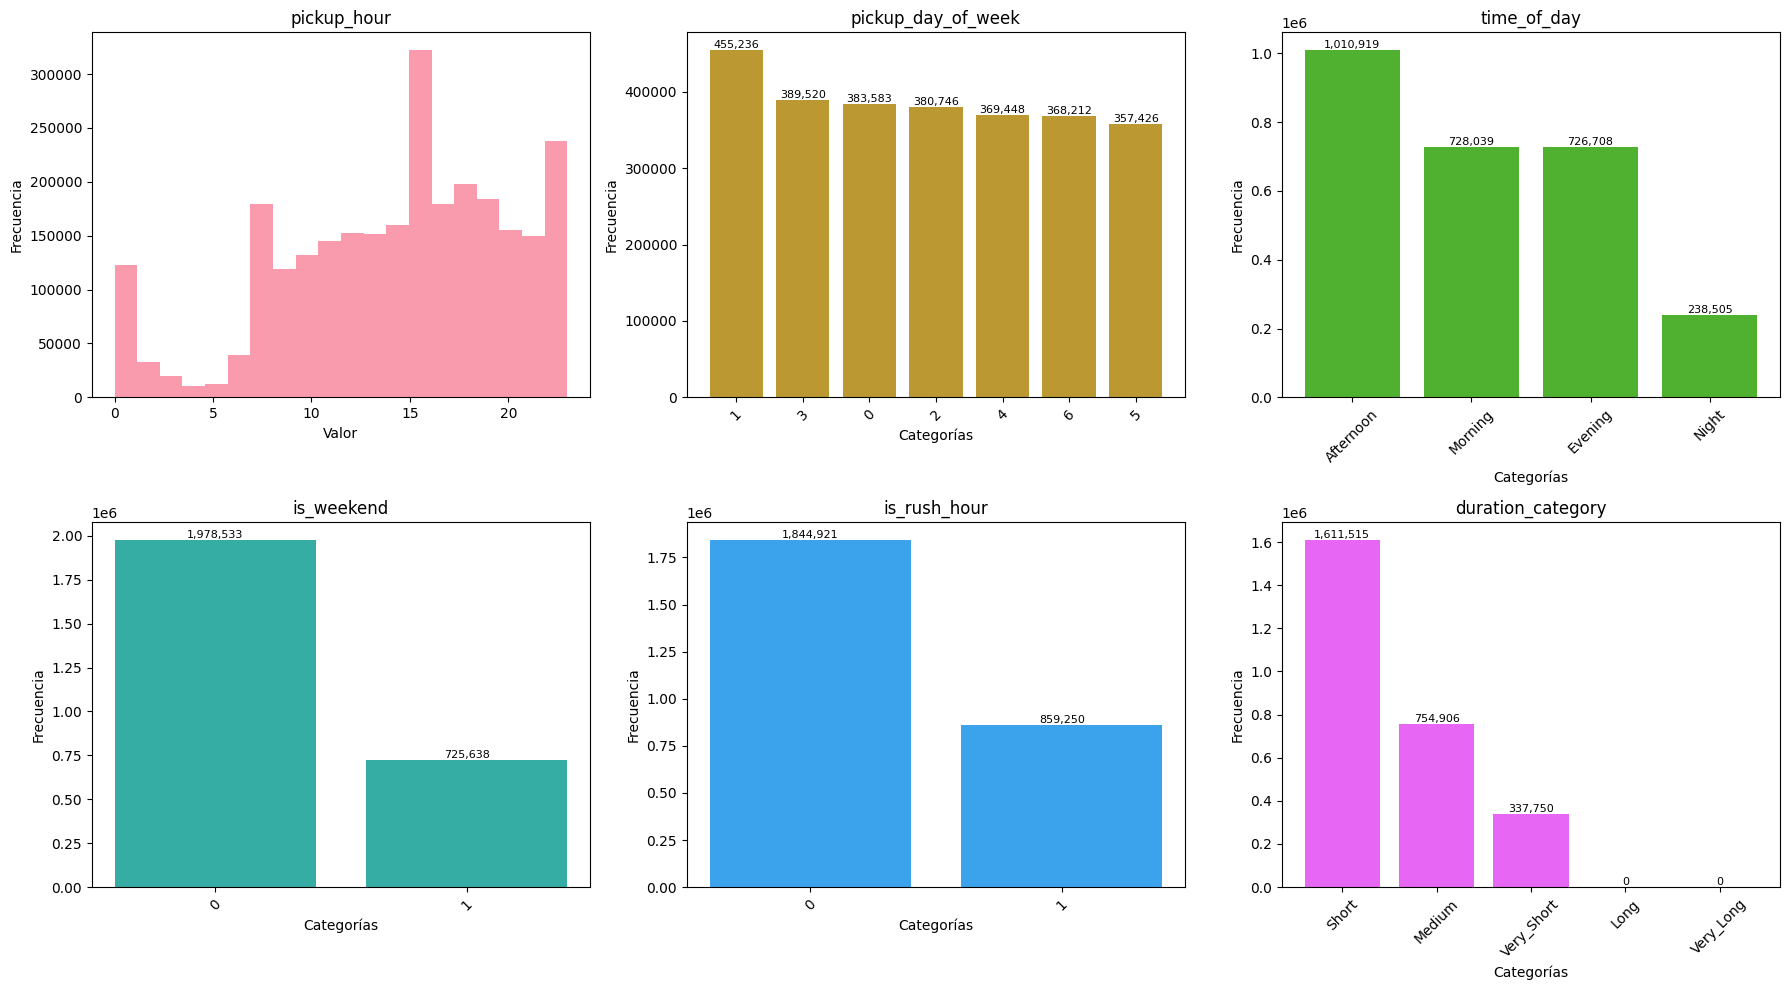


📈 ANÁLISIS DE PATRONES TEMPORALES:
   Horas pico: {18: np.int64(198283), 19: np.int64(183979), 17: np.int64(178956)}
   Distribución semanal: {'Lun': np.int64(383583), 'Mar': np.int64(455236), 'Mié': np.int64(380746), 'Jue': np.int64(389520), 'Vie': np.int64(369448), 'Sáb': np.int64(357426), 'Dom': np.int64(368212)}
   Viajes en fin de semana: 26.8%
   Viajes en horas pico: 31.8%


In [4]:
# Ejecutar creación de características temporales
print("🕒 CREANDO CARACTERÍSTICAS TEMPORALES")
print("="*50)

# Obtener número de columnas antes
initial_cols = len(feature_engineer.df.columns)
print(f"\n📊 Columnas antes: {initial_cols}")

# Crear características temporales
temporal_data = feature_engineer.create_temporal_features()

# Estadísticas después
final_cols = len(feature_engineer.df.columns)
new_cols = final_cols - initial_cols

print(f"\n✅ CARACTERÍSTICAS TEMPORALES CREADAS:")
print(f"   Columnas nuevas: {new_cols}")
print(f"   Total columnas: {final_cols}")

# Mostrar las nuevas características temporales creadas
temporal_features = [col for col in feature_engineer.df.columns 
                    if any(keyword in col.lower() for keyword in 
                          ['hour', 'day', 'weekend', 'rush', 'time', 'duration', 'monday', 'friday'])]

print(f"\n🔍 CARACTERÍSTICAS TEMPORALES CREADAS ({len(temporal_features)}):") 
for i, feature in enumerate(temporal_features, 1):
    sample_values = feature_engineer.df[feature].value_counts().head(3)
    print(f"   {i:2d}. {feature:<25} - Ejemplos: {dict(sample_values)}")

# Visualización de características temporales
if len(temporal_features) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    # Seleccionar características clave para visualizar
    key_features = ['pickup_hour', 'pickup_day_of_week', 'time_of_day', 
                   'is_weekend', 'is_rush_hour', 'duration_category']
    
    for i, feature in enumerate(key_features[:6]):
        if feature in feature_engineer.df.columns and i < len(axes):
            if feature_engineer.df[feature].dtype in ['object', 'category'] or len(feature_engineer.df[feature].unique()) <= 10:
                # Gráfico de barras para categóricas
                value_counts = feature_engineer.df[feature].value_counts()
                axes[i].bar(range(len(value_counts)), value_counts.values, color=f'C{i}')
                axes[i].set_title(f'{feature}')
                axes[i].set_xlabel('Categorías')
                axes[i].set_ylabel('Frecuencia')
                axes[i].set_xticks(range(len(value_counts)))
                axes[i].set_xticklabels([str(x) for x in value_counts.index], rotation=45)
                
                # Agregar valores sobre las barras
                for j, v in enumerate(value_counts.values):
                    axes[i].text(j, v, f'{v:,}', ha='center', va='bottom', fontsize=8)
            else:
                # Histograma para numéricas
                axes[i].hist(feature_engineer.df[feature], bins=20, alpha=0.7, color=f'C{i}')
                axes[i].set_title(f'{feature}')
                axes[i].set_xlabel('Valor')
                axes[i].set_ylabel('Frecuencia')
    
    # Ocultar subplots no utilizados
    for i in range(len(key_features), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Análisis específico de patrones temporales
print(f"\n📈 ANÁLISIS DE PATRONES TEMPORALES:")

if 'pickup_hour' in feature_engineer.df.columns:
    hourly_pattern = feature_engineer.df['pickup_hour'].value_counts().sort_index()
    peak_hours = hourly_pattern.nlargest(3)
    print(f"   Horas pico: {dict(peak_hours)}")

if 'pickup_day_of_week' in feature_engineer.df.columns:
    daily_pattern = feature_engineer.df['pickup_day_of_week'].value_counts().sort_index()
    weekday_names = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
    daily_named = {weekday_names[i]: daily_pattern.get(i, 0) for i in range(7)}
    print(f"   Distribución semanal: {daily_named}")

if 'is_weekend' in feature_engineer.df.columns:
    weekend_pct = feature_engineer.df['is_weekend'].mean() * 100
    print(f"   Viajes en fin de semana: {weekend_pct:.1f}%")

if 'is_rush_hour' in feature_engineer.df.columns:
    rush_pct = feature_engineer.df['is_rush_hour'].mean() * 100
    print(f"   Viajes en horas pico: {rush_pct:.1f}%")

## 5. Etapa 2: Características de Distancia

2025-11-28 19:24:33,026 - nyc_taxi_logger - INFO - Creando características de distancia...


📏 CREANDO CARACTERÍSTICAS DE DISTANCIA

📊 Columnas antes: 35


2025-11-28 19:24:33,254 - nyc_taxi_logger - INFO - Características de distancia creadas



✅ CARACTERÍSTICAS DE DISTANCIA CREADAS:
   Columnas nuevas: 5
   Total columnas: 40

🔍 CARACTERÍSTICAS DE DISTANCIA CREADAS (6):
    1. trip_distance             - Min: 0.01, Max: 7.43, Media: 1.95
    2. distance_category         - Ejemplos: {'Short': np.int64(1615230), 'Very_Short': np.int64(635339), 'Medium': np.int64(449720)}
    3. is_short_distance         - Min: 0.00, Max: 1.00, Media: 0.23
    4. is_medium_distance        - Min: 0.00, Max: 1.00, Media: 0.75
    5. is_long_distance          - Min: 0.00, Max: 0.00, Media: 0.00
    6. log_trip_distance         - Min: 0.01, Max: 2.13, Media: 1.01


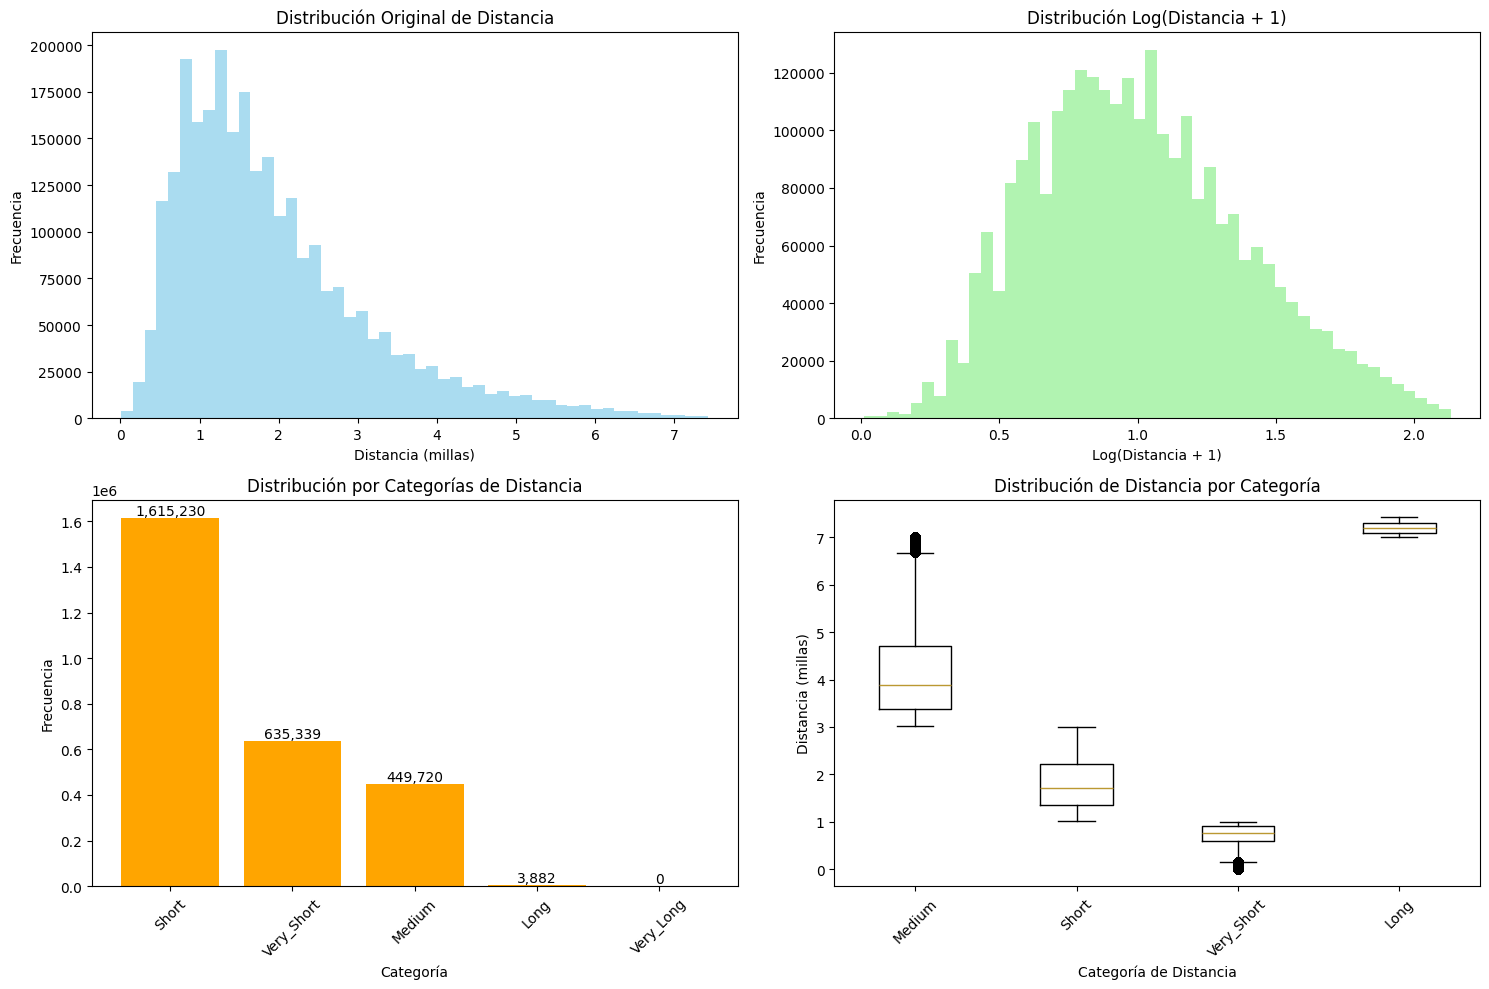


📊 ANÁLISIS DE DISTANCIA:
   Distancia promedio: 1.95 millas
   Distancia mediana: 1.63 millas
   Rango: 0.01 - 7.43 millas

   Distribución por categorías:
      Short: 59.7%
      Very_Short: 23.5%
      Medium: 16.6%
      Long: 0.1%
      Very_Long: 0.0%

   Indicadores de distancia:
      is_short_distance: 23.5%
      is_medium_distance: 75.0%
      is_long_distance: 0.0%


In [5]:
# Ejecutar creación de características de distancia
print("📏 CREANDO CARACTERÍSTICAS DE DISTANCIA")
print("="*50)

# Obtener número de columnas antes
initial_cols = len(feature_engineer.df.columns)
print(f"\n📊 Columnas antes: {initial_cols}")

# Crear características de distancia
distance_data = feature_engineer.create_distance_features()

# Estadísticas después
final_cols = len(feature_engineer.df.columns)
new_cols = final_cols - initial_cols

print(f"\n✅ CARACTERÍSTICAS DE DISTANCIA CREADAS:")
print(f"   Columnas nuevas: {new_cols}")
print(f"   Total columnas: {final_cols}")

# Mostrar las nuevas características de distancia creadas
distance_features = [col for col in feature_engineer.df.columns 
                    if any(keyword in col.lower() for keyword in 
                          ['distance', 'log_trip'])]

print(f"\n🔍 CARACTERÍSTICAS DE DISTANCIA CREADAS ({len(distance_features)}):") 
for i, feature in enumerate(distance_features, 1):
    if feature_engineer.df[feature].dtype in ['object', 'category']:
        sample_values = feature_engineer.df[feature].value_counts().head(3)
        print(f"   {i:2d}. {feature:<25} - Ejemplos: {dict(sample_values)}")
    else:
        stats = feature_engineer.df[feature].describe()
        print(f"   {i:2d}. {feature:<25} - Min: {stats['min']:.2f}, Max: {stats['max']:.2f}, Media: {stats['mean']:.2f}")

# Visualización de características de distancia
if 'trip_distance' in feature_engineer.df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Distribución original de distancia
    axes[0,0].hist(feature_engineer.df['trip_distance'], bins=50, alpha=0.7, color='skyblue')
    axes[0,0].set_title('Distribución Original de Distancia')
    axes[0,0].set_xlabel('Distancia (millas)')
    axes[0,0].set_ylabel('Frecuencia')
    
    # Distribución logarítmica si existe
    if 'log_trip_distance' in feature_engineer.df.columns:
        axes[0,1].hist(feature_engineer.df['log_trip_distance'], bins=50, alpha=0.7, color='lightgreen')
        axes[0,1].set_title('Distribución Log(Distancia + 1)')
        axes[0,1].set_xlabel('Log(Distancia + 1)')
        axes[0,1].set_ylabel('Frecuencia')
    
    # Categorías de distancia si existe
    if 'distance_category' in feature_engineer.df.columns:
        dist_counts = feature_engineer.df['distance_category'].value_counts()
        axes[1,0].bar(range(len(dist_counts)), dist_counts.values, color='orange')
        axes[1,0].set_title('Distribución por Categorías de Distancia')
        axes[1,0].set_xlabel('Categoría')
        axes[1,0].set_ylabel('Frecuencia')
        axes[1,0].set_xticks(range(len(dist_counts)))
        axes[1,0].set_xticklabels(dist_counts.index, rotation=45)
        
        # Agregar valores sobre las barras
        for i, v in enumerate(dist_counts.values):
            axes[1,0].text(i, v, f'{v:,}', ha='center', va='bottom')
    
    # Boxplot de distancia por categoría
    if 'distance_category' in feature_engineer.df.columns:
        categories = feature_engineer.df['distance_category'].unique()
        data_by_category = [feature_engineer.df[feature_engineer.df['distance_category'] == cat]['trip_distance'].values 
                           for cat in categories if not pd.isna(cat)]
        
        if data_by_category:
            axes[1,1].boxplot(data_by_category, labels=[str(cat) for cat in categories if not pd.isna(cat)])
            axes[1,1].set_title('Distribución de Distancia por Categoría')
            axes[1,1].set_xlabel('Categoría de Distancia')
            axes[1,1].set_ylabel('Distancia (millas)')
            axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Análisis de características de distancia
print(f"\n📊 ANÁLISIS DE DISTANCIA:")

if 'trip_distance' in feature_engineer.df.columns:
    dist_stats = feature_engineer.df['trip_distance'].describe()
    print(f"   Distancia promedio: {dist_stats['mean']:.2f} millas")
    print(f"   Distancia mediana: {dist_stats['50%']:.2f} millas")
    print(f"   Rango: {dist_stats['min']:.2f} - {dist_stats['max']:.2f} millas")

if 'distance_category' in feature_engineer.df.columns:
    dist_distribution = feature_engineer.df['distance_category'].value_counts(normalize=True) * 100
    print(f"\n   Distribución por categorías:")
    for cat, pct in dist_distribution.items():
        print(f"      {cat}: {pct:.1f}%")

# Indicadores binarios de distancia
binary_distance_features = ['is_short_distance', 'is_medium_distance', 'is_long_distance']
existing_binary = [col for col in binary_distance_features if col in feature_engineer.df.columns]

if existing_binary:
    print(f"\n   Indicadores de distancia:")
    for feature in existing_binary:
        pct = feature_engineer.df[feature].mean() * 100
        print(f"      {feature}: {pct:.1f}%")

## 6. Etapa 3: Características de Tarifas y Pagos

2025-11-28 19:24:37,970 - nyc_taxi_logger - INFO - Creando características de tarifas...


💰 CREANDO CARACTERÍSTICAS DE TARIFAS Y PAGOS

📊 Columnas antes: 40


2025-11-28 19:24:38,941 - nyc_taxi_logger - INFO - Características de tarifas creadas



✅ CARACTERÍSTICAS DE TARIFAS CREADAS:
   Columnas nuevas: 9
   Total columnas: 49

🔍 CARACTERÍSTICAS DE TARIFAS CREADAS (13):
    1. fare_amount               - Min: $0.01, Max: $23.20, Media: $9.88
    2. tip_amount                - Min: $0.00, Max: $5.90, Media: $1.95
    3. total_amount              - Min: $1.30, Max: $30.83, Media: $16.09
    4. log_trip_distance         - Min: $0.01, Max: $2.13, Media: $1.01
    5. tip_percentage            - Min: 0.00, Max: 200.00, Media: 21.00
    6. tip_category              - Ejemplos: {'High_Tip': np.int64(989616), 'Very_High_Tip': np.int64(693625), 'No_Tip': np.int64(629447)}
    7. has_tip                   - Min: $0.00, Max: $1.00, Media: $0.77
    8. generous_tipper           - Min: $0.00, Max: $1.00, Media: $0.63
    9. fare_per_mile             - Min: 0.00, Max: 2150.00, Media: 6.03
   10. fare_per_mile_category    - Ejemplos: {'Medium': np.int64(1686863), 'High': np.int64(906030), 'Very_High': np.int64(104670)}
   11. total_amount_cat

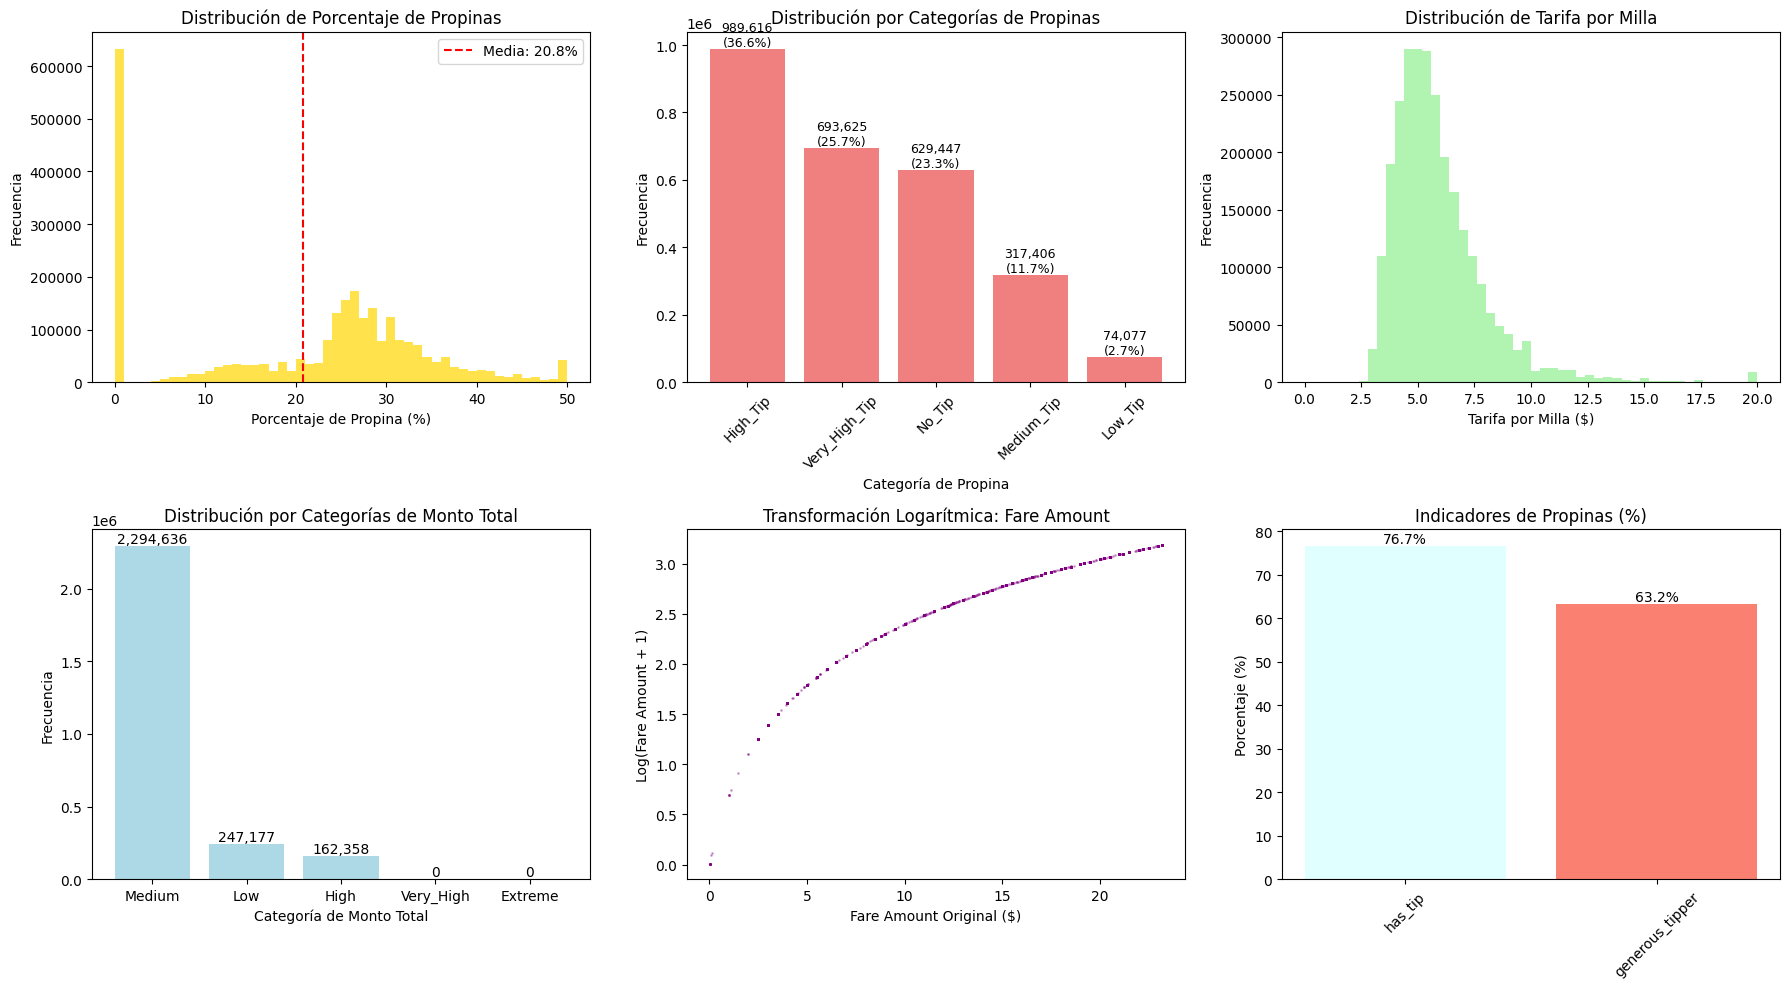


📊 ANÁLISIS DE TARIFAS Y PAGOS:
   Propina promedio: 21.00%
   Propina mediana: 25.08%
   Viajes sin propina: 23.3%

   Tarifa por milla promedio: $6.03
   Tarifa por milla mediana: $5.46

   Propinadores generosos (≥20%): 63.2%

   Distribución de categorías de propinas:
      High_Tip: 36.6%
      Very_High_Tip: 25.7%
      No_Tip: 23.3%
      Medium_Tip: 11.7%
      Low_Tip: 2.7%


In [6]:
# Ejecutar creación de características de tarifas
print("💰 CREANDO CARACTERÍSTICAS DE TARIFAS Y PAGOS")
print("="*50)

# Obtener número de columnas antes
initial_cols = len(feature_engineer.df.columns)
print(f"\n📊 Columnas antes: {initial_cols}")

# Crear características de tarifas
fare_data = feature_engineer.create_fare_features()

# Estadísticas después
final_cols = len(feature_engineer.df.columns)
new_cols = final_cols - initial_cols

print(f"\n✅ CARACTERÍSTICAS DE TARIFAS CREADAS:")
print(f"   Columnas nuevas: {new_cols}")
print(f"   Total columnas: {final_cols}")

# Mostrar las nuevas características de tarifas creadas
fare_features = [col for col in feature_engineer.df.columns 
                if any(keyword in col.lower() for keyword in 
                      ['tip', 'fare', 'total', 'generous', 'log_'])]

print(f"\n🔍 CARACTERÍSTICAS DE TARIFAS CREADAS ({len(fare_features)}):") 
for i, feature in enumerate(fare_features, 1):
    if feature_engineer.df[feature].dtype in ['object', 'category']:
        sample_values = feature_engineer.df[feature].value_counts().head(3)
        print(f"   {i:2d}. {feature:<25} - Ejemplos: {dict(sample_values)}")
    else:
        stats = feature_engineer.df[feature].describe()
        if 'percentage' in feature or 'per_mile' in feature:
            print(f"   {i:2d}. {feature:<25} - Min: {stats['min']:.2f}, Max: {stats['max']:.2f}, Media: {stats['mean']:.2f}")
        else:
            print(f"   {i:2d}. {feature:<25} - Min: ${stats['min']:.2f}, Max: ${stats['max']:.2f}, Media: ${stats['mean']:.2f}")

# Visualización de características de tarifas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Distribución de porcentaje de propinas
if 'tip_percentage' in feature_engineer.df.columns:
    tip_data = feature_engineer.df['tip_percentage'].clip(0, 50)  # Limitar outliers extremos
    axes[0,0].hist(tip_data, bins=50, alpha=0.7, color='gold')
    axes[0,0].set_title('Distribución de Porcentaje de Propinas')
    axes[0,0].set_xlabel('Porcentaje de Propina (%)')
    axes[0,0].set_ylabel('Frecuencia')
    axes[0,0].axvline(tip_data.mean(), color='red', linestyle='--', label=f'Media: {tip_data.mean():.1f}%')
    axes[0,0].legend()

# 2. Categorías de propinas
if 'tip_category' in feature_engineer.df.columns:
    tip_counts = feature_engineer.df['tip_category'].value_counts()
    axes[0,1].bar(range(len(tip_counts)), tip_counts.values, color='lightcoral')
    axes[0,1].set_title('Distribución por Categorías de Propinas')
    axes[0,1].set_xlabel('Categoría de Propina')
    axes[0,1].set_ylabel('Frecuencia')
    axes[0,1].set_xticks(range(len(tip_counts)))
    axes[0,1].set_xticklabels(tip_counts.index, rotation=45)
    
    # Agregar valores y porcentajes
    for i, v in enumerate(tip_counts.values):
        pct = (v / tip_counts.sum()) * 100
        axes[0,1].text(i, v, f'{v:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)

# 3. Tarifa por milla
if 'fare_per_mile' in feature_engineer.df.columns:
    fare_per_mile_data = feature_engineer.df['fare_per_mile'].clip(0, 20)  # Limitar outliers
    axes[0,2].hist(fare_per_mile_data, bins=50, alpha=0.7, color='lightgreen')
    axes[0,2].set_title('Distribución de Tarifa por Milla')
    axes[0,2].set_xlabel('Tarifa por Milla ($)')
    axes[0,2].set_ylabel('Frecuencia')

# 4. Categorías de monto total
if 'total_amount_category' in feature_engineer.df.columns:
    total_counts = feature_engineer.df['total_amount_category'].value_counts()
    axes[1,0].bar(range(len(total_counts)), total_counts.values, color='lightblue')
    axes[1,0].set_title('Distribución por Categorías de Monto Total')
    axes[1,0].set_xlabel('Categoría de Monto Total')
    axes[1,0].set_ylabel('Frecuencia')
    axes[1,0].set_xticks(range(len(total_counts)))
    axes[1,0].set_xticklabels(total_counts.index)
    
    for i, v in enumerate(total_counts.values):
        axes[1,0].text(i, v, f'{v:,}', ha='center', va='bottom')

# 5. Comparación: Fare Amount vs Log Fare Amount
if all(col in feature_engineer.df.columns for col in ['fare_amount', 'log_fare_amount']):
    axes[1,1].scatter(feature_engineer.df['fare_amount'].clip(0, 100), 
                     feature_engineer.df['log_fare_amount'], 
                     alpha=0.3, s=1, color='purple')
    axes[1,1].set_title('Transformación Logarítmica: Fare Amount')
    axes[1,1].set_xlabel('Fare Amount Original ($)')
    axes[1,1].set_ylabel('Log(Fare Amount + 1)')

# 6. Indicadores binarios de propinas
tip_indicators = ['has_tip', 'generous_tipper']
existing_tip_indicators = [col for col in tip_indicators if col in feature_engineer.df.columns]

if existing_tip_indicators:
    tip_percentages = [feature_engineer.df[col].mean() * 100 for col in existing_tip_indicators]
    colors = ['lightcyan', 'salmon'][:len(existing_tip_indicators)]
    
    bars = axes[1,2].bar(existing_tip_indicators, tip_percentages, color=colors)
    axes[1,2].set_title('Indicadores de Propinas (%)')
    axes[1,2].set_ylabel('Porcentaje (%)')
    axes[1,2].set_xticklabels(existing_tip_indicators, rotation=45)
    
    # Agregar valores sobre las barras
    for bar, pct in zip(bars, tip_percentages):
        axes[1,2].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                      f'{pct:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Análisis detallado de características de tarifas
print(f"\n📊 ANÁLISIS DE TARIFAS Y PAGOS:")

if 'tip_percentage' in feature_engineer.df.columns:
    tip_stats = feature_engineer.df['tip_percentage'].describe()
    print(f"   Propina promedio: {tip_stats['mean']:.2f}%")
    print(f"   Propina mediana: {tip_stats['50%']:.2f}%")
    
    # Viajes sin propina
    no_tip_pct = (feature_engineer.df['tip_percentage'] == 0).mean() * 100
    print(f"   Viajes sin propina: {no_tip_pct:.1f}%")

if 'fare_per_mile' in feature_engineer.df.columns:
    fpm_stats = feature_engineer.df['fare_per_mile'].describe()
    print(f"\n   Tarifa por milla promedio: ${fpm_stats['mean']:.2f}")
    print(f"   Tarifa por milla mediana: ${fpm_stats['50%']:.2f}")

if 'generous_tipper' in feature_engineer.df.columns:
    generous_pct = feature_engineer.df['generous_tipper'].mean() * 100
    print(f"\n   Propinadores generosos (≥20%): {generous_pct:.1f}%")

# Análisis por categorías
if 'tip_category' in feature_engineer.df.columns:
    print(f"\n   Distribución de categorías de propinas:")
    tip_dist = feature_engineer.df['tip_category'].value_counts(normalize=True) * 100
    for category, pct in tip_dist.items():
        print(f"      {category}: {pct:.1f}%")

## 7. Etapa 4: Características de Velocidad y Eficiencia

2025-11-28 19:24:45,711 - nyc_taxi_logger - INFO - Creando características de velocidad...


🚗 CREANDO CARACTERÍSTICAS DE VELOCIDAD Y EFICIENCIA

📊 Columnas antes: 49


2025-11-28 19:24:45,892 - nyc_taxi_logger - INFO - Características de velocidad creadas



✅ CARACTERÍSTICAS DE VELOCIDAD CREADAS:
   Columnas nuevas: 5
   Total columnas: 54

🔍 CARACTERÍSTICAS DE VELOCIDAD CREADAS (5):
    1. avg_speed_mph             - Min: 0.02mph, Max: 423.87mph, Media: 10.35mph
    2. speed_category            - Ejemplos: {'Slow': np.int64(2226370), 'Medium': np.int64(307548), 'Very_Slow': np.int64(146098)}
    3. is_slow_trip              - Min: 0.00, Max: 1.00, Media: 0.55
    4. is_fast_trip              - Min: 0.00, Max: 1.00, Media: 0.00
    5. trip_efficiency           - Min: 2.04, Max: 60.00, Media: 7.17


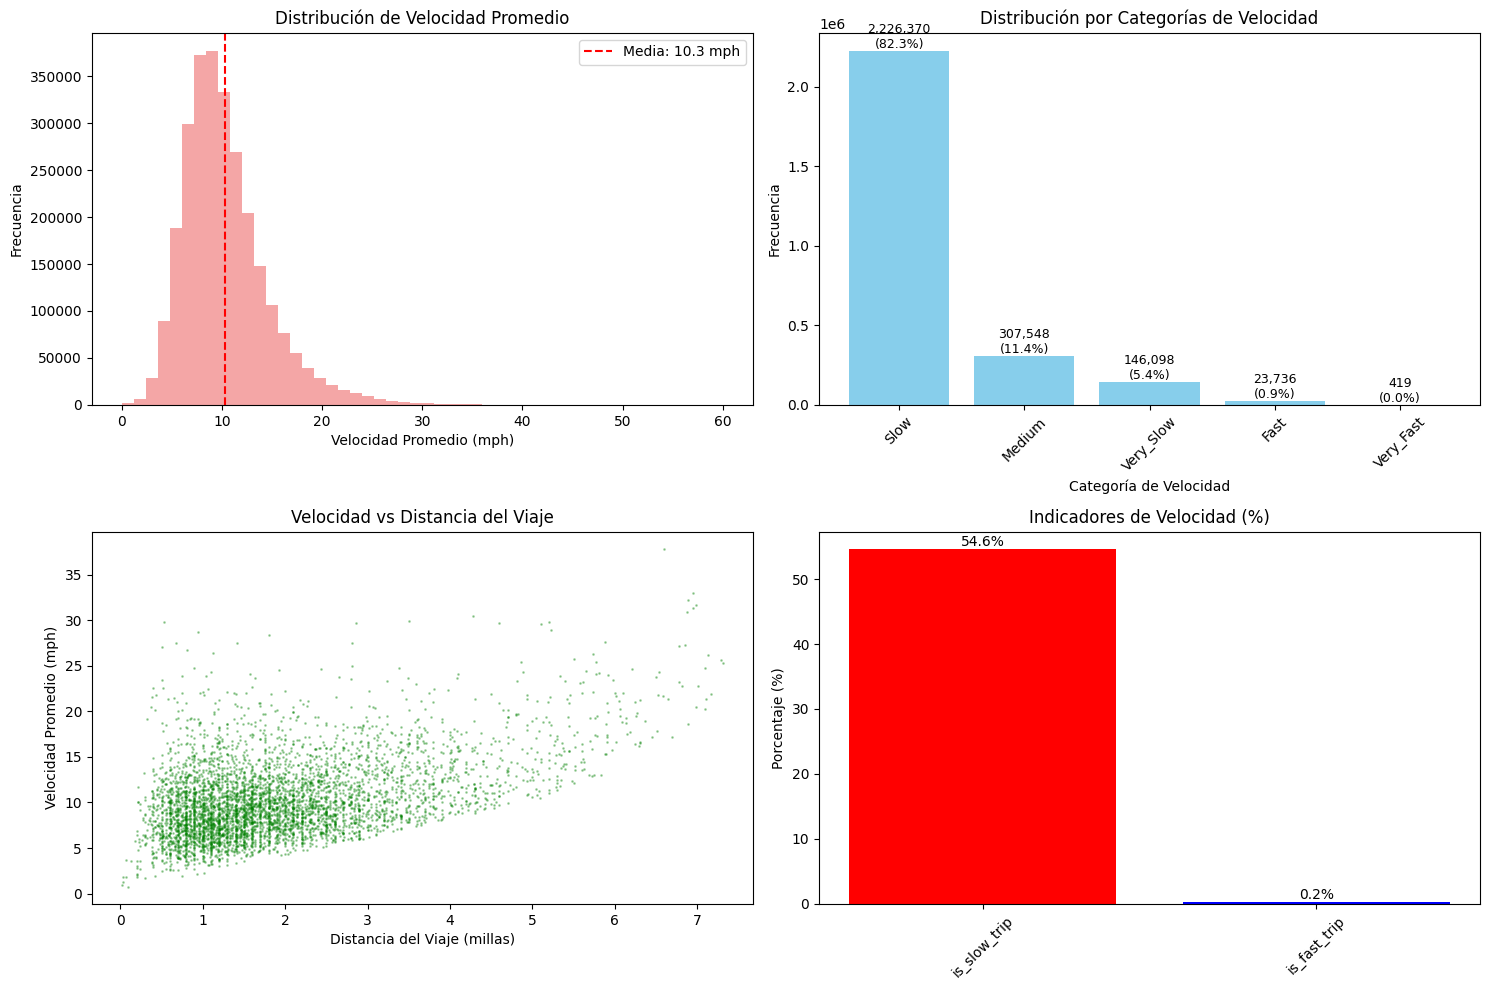


📊 ANÁLISIS DE VELOCIDAD Y EFICIENCIA:
   Velocidad promedio: 10.35 mph
   Velocidad mediana: 9.59 mph
   Rango de velocidad: 0.02 - 423.87 mph

   Distribución por categorías de velocidad:
      Slow: 82.3%
      Medium: 11.4%
      Very_Slow: 5.4%
      Fast: 0.9%
      Very_Fast: 0.0%

   Indicadores de velocidad:
      is_slow_trip: 54.6%
      is_fast_trip: 0.2%

   Eficiencia del viaje:
      Promedio: 7.169
      Mediana: 5.564

📈 CORRELACIONES CLAVE:

   Matriz de correlación:
      avg_speed_mph vs trip_distance: 0.487
      avg_speed_mph vs trip_duration_minutes: -0.176
      trip_distance vs trip_duration_minutes: 0.702


In [7]:
# Ejecutar creación de características de velocidad
print("🚗 CREANDO CARACTERÍSTICAS DE VELOCIDAD Y EFICIENCIA")
print("="*50)

# Obtener número de columnas antes
initial_cols = len(feature_engineer.df.columns)
print(f"\n📊 Columnas antes: {initial_cols}")

# Crear características de velocidad
speed_data = feature_engineer.create_speed_features()

# Estadísticas después
final_cols = len(feature_engineer.df.columns)
new_cols = final_cols - initial_cols

print(f"\n✅ CARACTERÍSTICAS DE VELOCIDAD CREADAS:")
print(f"   Columnas nuevas: {new_cols}")
print(f"   Total columnas: {final_cols}")

# Mostrar las nuevas características de velocidad creadas
speed_features = [col for col in feature_engineer.df.columns 
                 if any(keyword in col.lower() for keyword in 
                       ['speed', 'efficiency', 'slow', 'fast'])]

print(f"\n🔍 CARACTERÍSTICAS DE VELOCIDAD CREADAS ({len(speed_features)}):") 
for i, feature in enumerate(speed_features, 1):
    if feature_engineer.df[feature].dtype in ['object', 'category']:
        sample_values = feature_engineer.df[feature].value_counts().head(3)
        print(f"   {i:2d}. {feature:<25} - Ejemplos: {dict(sample_values)}")
    else:
        stats = feature_engineer.df[feature].describe()
        unit = "mph" if "speed" in feature else ""
        print(f"   {i:2d}. {feature:<25} - Min: {stats['min']:.2f}{unit}, Max: {stats['max']:.2f}{unit}, Media: {stats['mean']:.2f}{unit}")

# Visualización de características de velocidad
if 'avg_speed_mph' in feature_engineer.df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Distribución de velocidad promedio
    speed_data_clipped = feature_engineer.df['avg_speed_mph'].clip(0, 60)  # Limitar outliers
    axes[0,0].hist(speed_data_clipped, bins=50, alpha=0.7, color='lightcoral')
    axes[0,0].set_title('Distribución de Velocidad Promedio')
    axes[0,0].set_xlabel('Velocidad Promedio (mph)')
    axes[0,0].set_ylabel('Frecuencia')
    axes[0,0].axvline(speed_data_clipped.mean(), color='red', linestyle='--', 
                     label=f'Media: {speed_data_clipped.mean():.1f} mph')
    axes[0,0].legend()
    
    # 2. Categorías de velocidad
    if 'speed_category' in feature_engineer.df.columns:
        speed_counts = feature_engineer.df['speed_category'].value_counts()
        axes[0,1].bar(range(len(speed_counts)), speed_counts.values, color='skyblue')
        axes[0,1].set_title('Distribución por Categorías de Velocidad')
        axes[0,1].set_xlabel('Categoría de Velocidad')
        axes[0,1].set_ylabel('Frecuencia')
        axes[0,1].set_xticks(range(len(speed_counts)))
        axes[0,1].set_xticklabels(speed_counts.index, rotation=45)
        
        # Agregar valores sobre las barras
        for i, v in enumerate(speed_counts.values):
            pct = (v / speed_counts.sum()) * 100
            axes[0,1].text(i, v, f'{v:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)
    
    # 3. Relación velocidad vs distancia
    if 'trip_distance' in feature_engineer.df.columns:
        # Crear scatter plot con sample para mejor visualización
        sample_size = min(5000, len(feature_engineer.df))
        sample_data = feature_engineer.df.sample(n=sample_size, random_state=42)
        
        axes[1,0].scatter(sample_data['trip_distance'].clip(0, 20), 
                         sample_data['avg_speed_mph'].clip(0, 60),
                         alpha=0.3, s=1, color='green')
        axes[1,0].set_title('Velocidad vs Distancia del Viaje')
        axes[1,0].set_xlabel('Distancia del Viaje (millas)')
        axes[1,0].set_ylabel('Velocidad Promedio (mph)')
    
    # 4. Indicadores binarios de velocidad
    speed_indicators = ['is_slow_trip', 'is_fast_trip']
    existing_indicators = [col for col in speed_indicators if col in feature_engineer.df.columns]
    
    if existing_indicators:
        indicator_percentages = [feature_engineer.df[col].mean() * 100 for col in existing_indicators]
        colors = ['red', 'blue'][:len(existing_indicators)]
        
        bars = axes[1,1].bar(existing_indicators, indicator_percentages, color=colors)
        axes[1,1].set_title('Indicadores de Velocidad (%)')
        axes[1,1].set_ylabel('Porcentaje (%)')
        axes[1,1].set_xticklabels(existing_indicators, rotation=45)
        
        # Agregar valores sobre las barras
        for bar, pct in zip(bars, indicator_percentages):
            axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                          f'{pct:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Análisis detallado de velocidad
print(f"\n📊 ANÁLISIS DE VELOCIDAD Y EFICIENCIA:")

if 'avg_speed_mph' in feature_engineer.df.columns:
    speed_stats = feature_engineer.df['avg_speed_mph'].describe()
    print(f"   Velocidad promedio: {speed_stats['mean']:.2f} mph")
    print(f"   Velocidad mediana: {speed_stats['50%']:.2f} mph")
    print(f"   Rango de velocidad: {speed_stats['min']:.2f} - {speed_stats['max']:.2f} mph")

# Análisis por categorías de velocidad
if 'speed_category' in feature_engineer.df.columns:
    print(f"\n   Distribución por categorías de velocidad:")
    speed_dist = feature_engineer.df['speed_category'].value_counts(normalize=True) * 100
    for category, pct in speed_dist.items():
        print(f"      {category}: {pct:.1f}%")

# Análisis de indicadores binarios
speed_binary_features = ['is_slow_trip', 'is_fast_trip']
existing_binary_speed = [col for col in speed_binary_features if col in feature_engineer.df.columns]

if existing_binary_speed:
    print(f"\n   Indicadores de velocidad:")
    for feature in existing_binary_speed:
        pct = feature_engineer.df[feature].mean() * 100
        print(f"      {feature}: {pct:.1f}%")

# Análisis de eficiencia si existe
if 'trip_efficiency' in feature_engineer.df.columns:
    eff_stats = feature_engineer.df['trip_efficiency'].describe()
    print(f"\n   Eficiencia del viaje:")
    print(f"      Promedio: {eff_stats['mean']:.3f}")
    print(f"      Mediana: {eff_stats['50%']:.3f}")

# Correlación entre velocidad, distancia y duración
print(f"\n📈 CORRELACIONES CLAVE:")
correlation_cols = ['avg_speed_mph', 'trip_distance', 'trip_duration_minutes']
existing_corr_cols = [col for col in correlation_cols if col in feature_engineer.df.columns]

if len(existing_corr_cols) >= 2:
    corr_matrix = feature_engineer.df[existing_corr_cols].corr()
    print(f"\n   Matriz de correlación:")
    for i, col1 in enumerate(existing_corr_cols):
        for j, col2 in enumerate(existing_corr_cols):
            if i < j:  # Solo mostrar mitad superior
                corr_value = corr_matrix.loc[col1, col2]
                print(f"      {col1} vs {col2}: {corr_value:.3f}")

## 8. Etapa 5: Características Categóricas Mejoradas

2025-11-28 19:24:48,125 - nyc_taxi_logger - INFO - Creando características categóricas...


🏷️ CREANDO CARACTERÍSTICAS CATEGÓRICAS MEJORADAS

📊 Columnas antes: 54


2025-11-28 19:24:49,302 - nyc_taxi_logger - INFO - Características categóricas creadas



✅ CARACTERÍSTICAS CATEGÓRICAS CREADAS:
   Columnas nuevas: 14
   Total columnas: 68

🔍 CARACTERÍSTICAS CATEGÓRICAS MEJORADAS (12):
    1. vendor_name               - 2 categorías, Ejemplos: {'Curb_Mobility': np.int64(1922799), 'Creative_Mobile': np.int64(781372)}
    2. ratecode_name             - 6 categorías, Ejemplos: {'Standard': np.int64(2700982), 'Unknown': np.int64(2339)}
    3. is_airport_trip           - 0.0% = 1
    4. is_jfk_trip               - 0.0% = 1
    5. is_newark_trip            - 0.0% = 1
    6. payment_name              - 4 categorías, Ejemplos: {'Credit_Card': np.int64(2141156), 'Cash': np.int64(554470)}
    7. is_credit_card            - 79.2% = 1
    8. is_cash_payment           - 20.5% = 1
    9. passenger_category        - 4 categorías, Ejemplos: {'Single': np.int64(2056320), 'Couple': np.int64(413213)}
   10. is_single_passenger       - 76.0% = 1
   11. is_group_trip             - 8.7% = 1
   12. is_store_forward          - 1.5% = 1


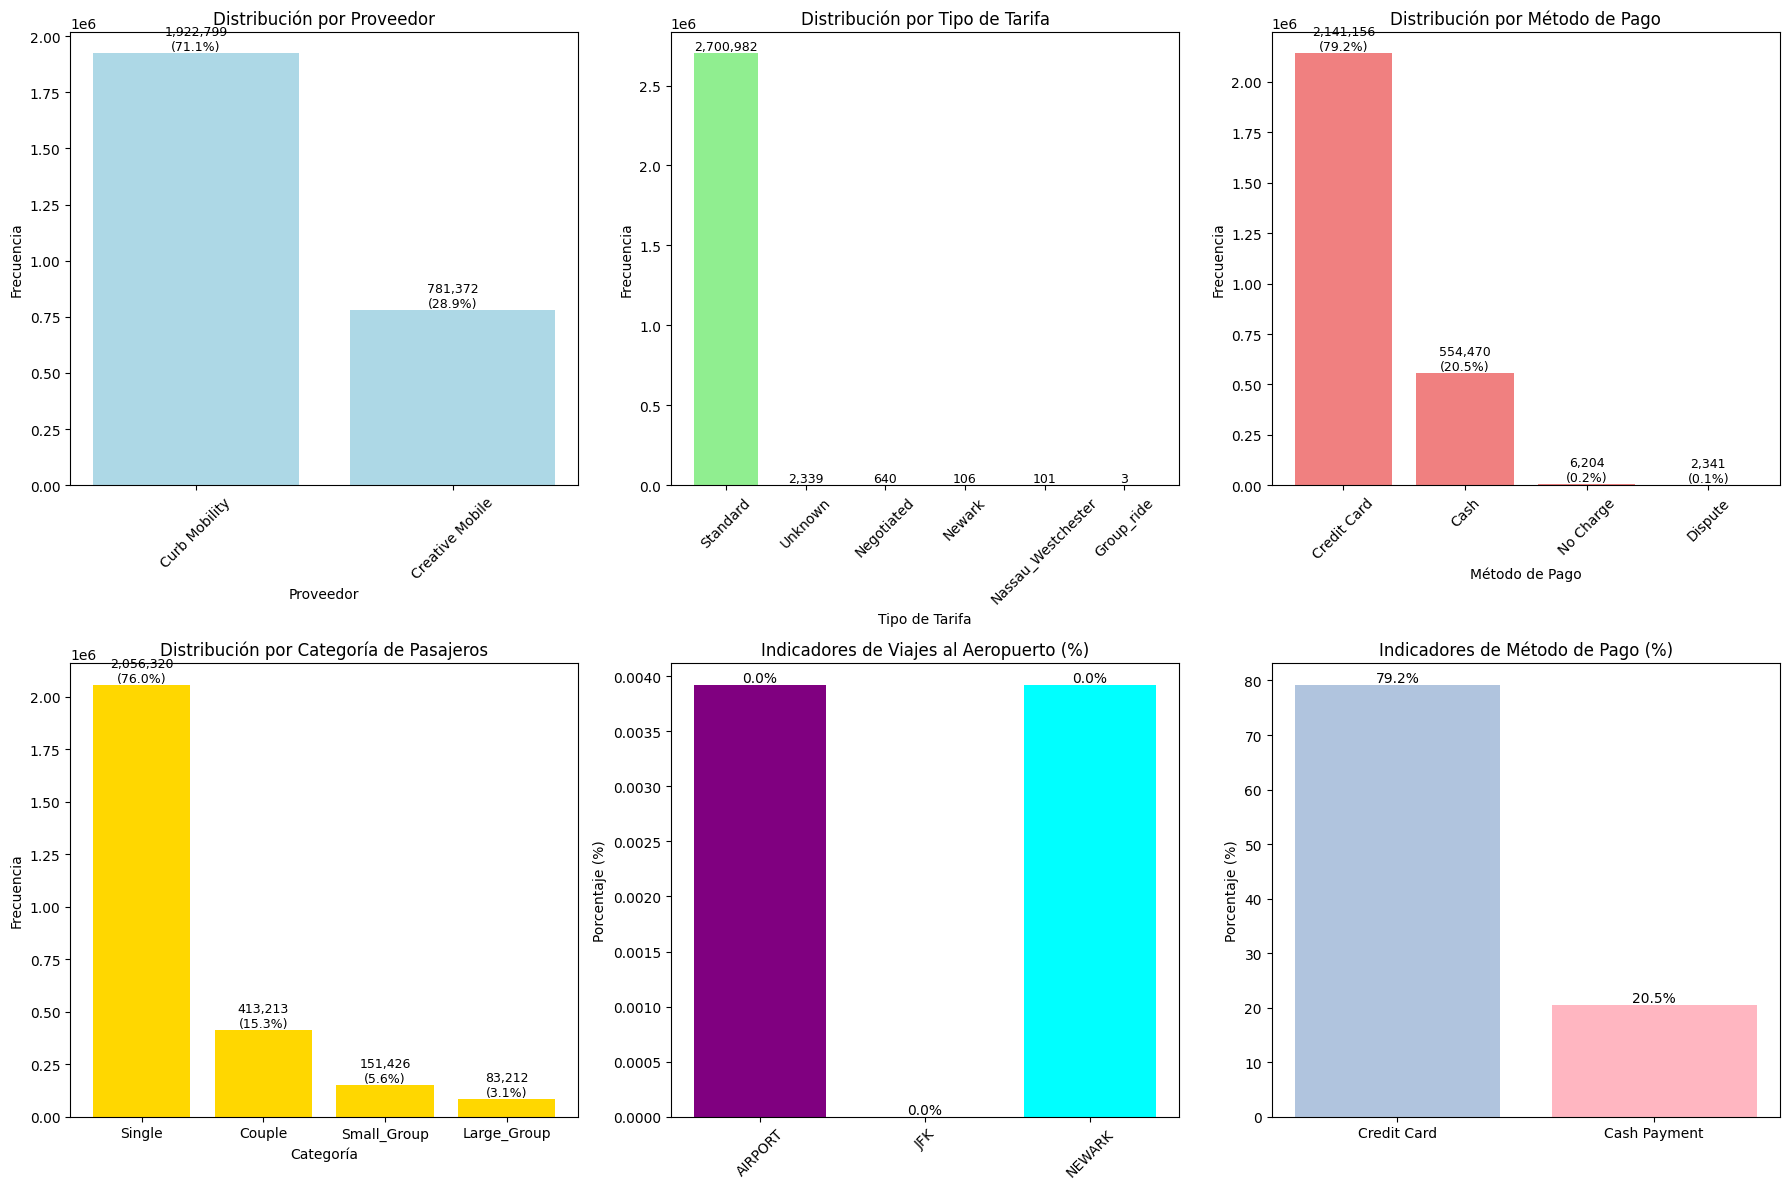


📊 ANÁLISIS DE CARACTERÍSTICAS CATEGÓRICAS:

   Distribución por proveedores:
      Curb Mobility: 71.1%
      Creative Mobile: 28.9%

   Distribución por tipos de tarifa:
      Standard: 99.9%
      Unknown: 0.1%
      Negotiated: 0.0%
      Newark: 0.0%
      Nassau_Westchester: 0.0%
      Group_ride: 0.0%

   Distribución por métodos de pago:
      Credit Card: 79.2%
      Cash: 20.5%
      No Charge: 0.2%
      Dispute: 0.1%

   Indicadores especiales:
      Airport Trip: 0.0%
      Standard Rate: 99.9%
      Single Passenger: 76.0%
      Group Trip: 8.7%


In [8]:
# Ejecutar creación de características categóricas mejoradas
print("🏷️ CREANDO CARACTERÍSTICAS CATEGÓRICAS MEJORADAS")
print("="*50)

# Obtener número de columnas antes
initial_cols = len(feature_engineer.df.columns)
print(f"\n📊 Columnas antes: {initial_cols}")

# Crear características categóricas
categorical_data = feature_engineer.create_categorical_features()

# Estadísticas después
final_cols = len(feature_engineer.df.columns)
new_cols = final_cols - initial_cols

print(f"\n✅ CARACTERÍSTICAS CATEGÓRICAS CREADAS:")
print(f"   Columnas nuevas: {new_cols}")
print(f"   Total columnas: {final_cols}")

# Mostrar las nuevas características categóricas creadas
categorical_features = [col for col in feature_engineer.df.columns 
                       if any(keyword in col.lower() for keyword in 
                             ['vendor_name', 'ratecode_name', 'payment_name', 'passenger_category',
                              'is_airport', 'is_jfk', 'is_newark', 'is_credit', 'is_cash', 'is_single', 'is_group', 'is_store'])]

print(f"\n🔍 CARACTERÍSTICAS CATEGÓRICAS MEJORADAS ({len(categorical_features)}):") 
for i, feature in enumerate(categorical_features, 1):
    if feature_engineer.df[feature].dtype in ['object', 'category']:
        unique_values = feature_engineer.df[feature].nunique()
        sample_values = feature_engineer.df[feature].value_counts().head(2)
        print(f"   {i:2d}. {feature:<25} - {unique_values} categorías, Ejemplos: {dict(sample_values)}")
    else:
        # Para indicadores binarios
        pct = feature_engineer.df[feature].mean() * 100
        print(f"   {i:2d}. {feature:<25} - {pct:.1f}% = 1")

# Visualización de características categóricas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribución de proveedores (vendor)
if 'vendor_name' in feature_engineer.df.columns:
    vendor_counts = feature_engineer.df['vendor_name'].value_counts()
    axes[0,0].bar(range(len(vendor_counts)), vendor_counts.values, color='lightblue')
    axes[0,0].set_title('Distribución por Proveedor')
    axes[0,0].set_xlabel('Proveedor')
    axes[0,0].set_ylabel('Frecuencia')
    axes[0,0].set_xticks(range(len(vendor_counts)))
    axes[0,0].set_xticklabels([name.replace('_', ' ') for name in vendor_counts.index], rotation=45)
    
    for i, v in enumerate(vendor_counts.values):
        pct = (v / vendor_counts.sum()) * 100
        axes[0,0].text(i, v, f'{v:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)

# 2. Tipos de tarifa (ratecode)
if 'ratecode_name' in feature_engineer.df.columns:
    rate_counts = feature_engineer.df['ratecode_name'].value_counts()
    axes[0,1].bar(range(len(rate_counts)), rate_counts.values, color='lightgreen')
    axes[0,1].set_title('Distribución por Tipo de Tarifa')
    axes[0,1].set_xlabel('Tipo de Tarifa')
    axes[0,1].set_ylabel('Frecuencia')
    axes[0,1].set_xticks(range(len(rate_counts)))
    axes[0,1].set_xticklabels(rate_counts.index, rotation=45)
    
    for i, v in enumerate(rate_counts.values):
        if v > 0:
            axes[0,1].text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=9)

# 3. Métodos de pago
if 'payment_name' in feature_engineer.df.columns:
    payment_counts = feature_engineer.df['payment_name'].value_counts()
    axes[0,2].bar(range(len(payment_counts)), payment_counts.values, color='lightcoral')
    axes[0,2].set_title('Distribución por Método de Pago')
    axes[0,2].set_xlabel('Método de Pago')
    axes[0,2].set_ylabel('Frecuencia')
    axes[0,2].set_xticks(range(len(payment_counts)))
    axes[0,2].set_xticklabels([name.replace('_', ' ') for name in payment_counts.index], rotation=45)
    
    for i, v in enumerate(payment_counts.values):
        pct = (v / payment_counts.sum()) * 100
        axes[0,2].text(i, v, f'{v:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)

# 4. Categorías de pasajeros
if 'passenger_category' in feature_engineer.df.columns:
    passenger_counts = feature_engineer.df['passenger_category'].value_counts()
    axes[1,0].bar(range(len(passenger_counts)), passenger_counts.values, color='gold')
    axes[1,0].set_title('Distribución por Categoría de Pasajeros')
    axes[1,0].set_xlabel('Categoría')
    axes[1,0].set_ylabel('Frecuencia')
    axes[1,0].set_xticks(range(len(passenger_counts)))
    axes[1,0].set_xticklabels(passenger_counts.index)
    
    for i, v in enumerate(passenger_counts.values):
        pct = (v / passenger_counts.sum()) * 100
        axes[1,0].text(i, v, f'{v:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)

# 5. Indicadores de aeropuerto
airport_indicators = ['is_airport_trip', 'is_jfk_trip', 'is_newark_trip']
existing_airport = [col for col in airport_indicators if col in feature_engineer.df.columns]

if existing_airport:
    airport_percentages = [feature_engineer.df[col].mean() * 100 for col in existing_airport]
    labels = [col.replace('is_', '').replace('_trip', '').upper() for col in existing_airport]
    colors = ['purple', 'orange', 'cyan'][:len(existing_airport)]
    
    bars = axes[1,1].bar(labels, airport_percentages, color=colors)
    axes[1,1].set_title('Indicadores de Viajes al Aeropuerto (%)')
    axes[1,1].set_ylabel('Porcentaje (%)')
    axes[1,1].set_xticklabels(labels, rotation=45)
    
    for bar, pct in zip(bars, airport_percentages):
        axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                      f'{pct:.1f}%', ha='center', va='bottom')

# 6. Indicadores de pago
payment_indicators = ['is_credit_card', 'is_cash_payment']
existing_payment = [col for col in payment_indicators if col in feature_engineer.df.columns]

if existing_payment:
    payment_percentages = [feature_engineer.df[col].mean() * 100 for col in existing_payment]
    labels = [col.replace('is_', '').replace('_', ' ').title() for col in existing_payment]
    colors = ['lightsteelblue', 'lightpink'][:len(existing_payment)]
    
    bars = axes[1,2].bar(labels, payment_percentages, color=colors)
    axes[1,2].set_title('Indicadores de Método de Pago (%)')
    axes[1,2].set_ylabel('Porcentaje (%)')
    
    for bar, pct in zip(bars, payment_percentages):
        axes[1,2].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                      f'{pct:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Análisis detallado de características categóricas
print(f"\n📊 ANÁLISIS DE CARACTERÍSTICAS CATEGÓRICAS:")

# Análisis de proveedores
if 'vendor_name' in feature_engineer.df.columns:
    print(f"\n   Distribución por proveedores:")
    vendor_dist = feature_engineer.df['vendor_name'].value_counts(normalize=True) * 100
    for vendor, pct in vendor_dist.items():
        print(f"      {vendor.replace('_', ' ')}: {pct:.1f}%")

# Análisis de tipos de tarifa
if 'ratecode_name' in feature_engineer.df.columns:
    print(f"\n   Distribución por tipos de tarifa:")
    rate_dist = feature_engineer.df['ratecode_name'].value_counts(normalize=True) * 100
    for rate, pct in rate_dist.items():
        print(f"      {rate}: {pct:.1f}%")

# Análisis de métodos de pago
if 'payment_name' in feature_engineer.df.columns:
    print(f"\n   Distribución por métodos de pago:")
    payment_dist = feature_engineer.df['payment_name'].value_counts(normalize=True) * 100
    for payment, pct in payment_dist.items():
        print(f"      {payment.replace('_', ' ')}: {pct:.1f}%")

# Análisis de indicadores especiales
special_indicators = ['is_airport_trip', 'is_standard_rate', 'is_single_passenger', 'is_group_trip']
existing_special = [col for col in special_indicators if col in feature_engineer.df.columns]

if existing_special:
    print(f"\n   Indicadores especiales:")
    for indicator in existing_special:
        pct = feature_engineer.df[indicator].mean() * 100
        description = indicator.replace('is_', '').replace('_', ' ').title()
        print(f"      {description}: {pct:.1f}%")

## 9. Etapas 6-10: Pipeline Completo de Características Restantes

2025-11-28 19:24:52,526 - nyc_taxi_logger - INFO - Creando características de ubicación...


🔧 EJECUTANDO ETAPAS RESTANTES DEL PIPELINE

📊 Columnas antes de etapas restantes: 68

📍 Etapa 6: Características de Ubicación...


2025-11-28 19:24:55,050 - nyc_taxi_logger - INFO - Características de ubicación creadas
2025-11-28 19:24:55,054 - nyc_taxi_logger - INFO - Creando características de interacción...
2025-11-28 19:24:55,213 - nyc_taxi_logger - INFO - Características de interacción creadas
2025-11-28 19:24:55,216 - nyc_taxi_logger - INFO - Creando características estadísticas...


🔗 Etapa 7: Características de Interacción...
📊 Etapa 8: Características Estadísticas...


2025-11-28 19:24:56,187 - nyc_taxi_logger - INFO - Características estadísticas creadas
2025-11-28 19:24:56,189 - nyc_taxi_logger - INFO - Aplicando encoding a variables categóricas...


🔢 Etapa 9: Encoding de Variables Categóricas...


2025-11-28 19:25:05,480 - nyc_taxi_logger - INFO - Encoding de variables categóricas completado



✅ ETAPAS RESTANTES COMPLETADAS:
   Columnas agregadas en etapas 6-9: 42
   Total de columnas final: 110

🔍 NUEVAS CARACTERÍSTICAS POR CATEGORÍA:
   📍 Ubicación (5): ['is_round_trip', 'route_id', 'pickup_popularity']...
   🔗 Interacción (5): ['weekend_rush', 'credit_card_with_tip', 'long_distance_long_time']...
   📊 Estadísticas (8): ['hourly_fare_amount_mean', 'hourly_fare_amount_std', 'hourly_trip_distance_mean']...
   🔢 Encoding (12): ['distance_category_encoded', 'duration_category_encoded', 'speed_category_encoded']...


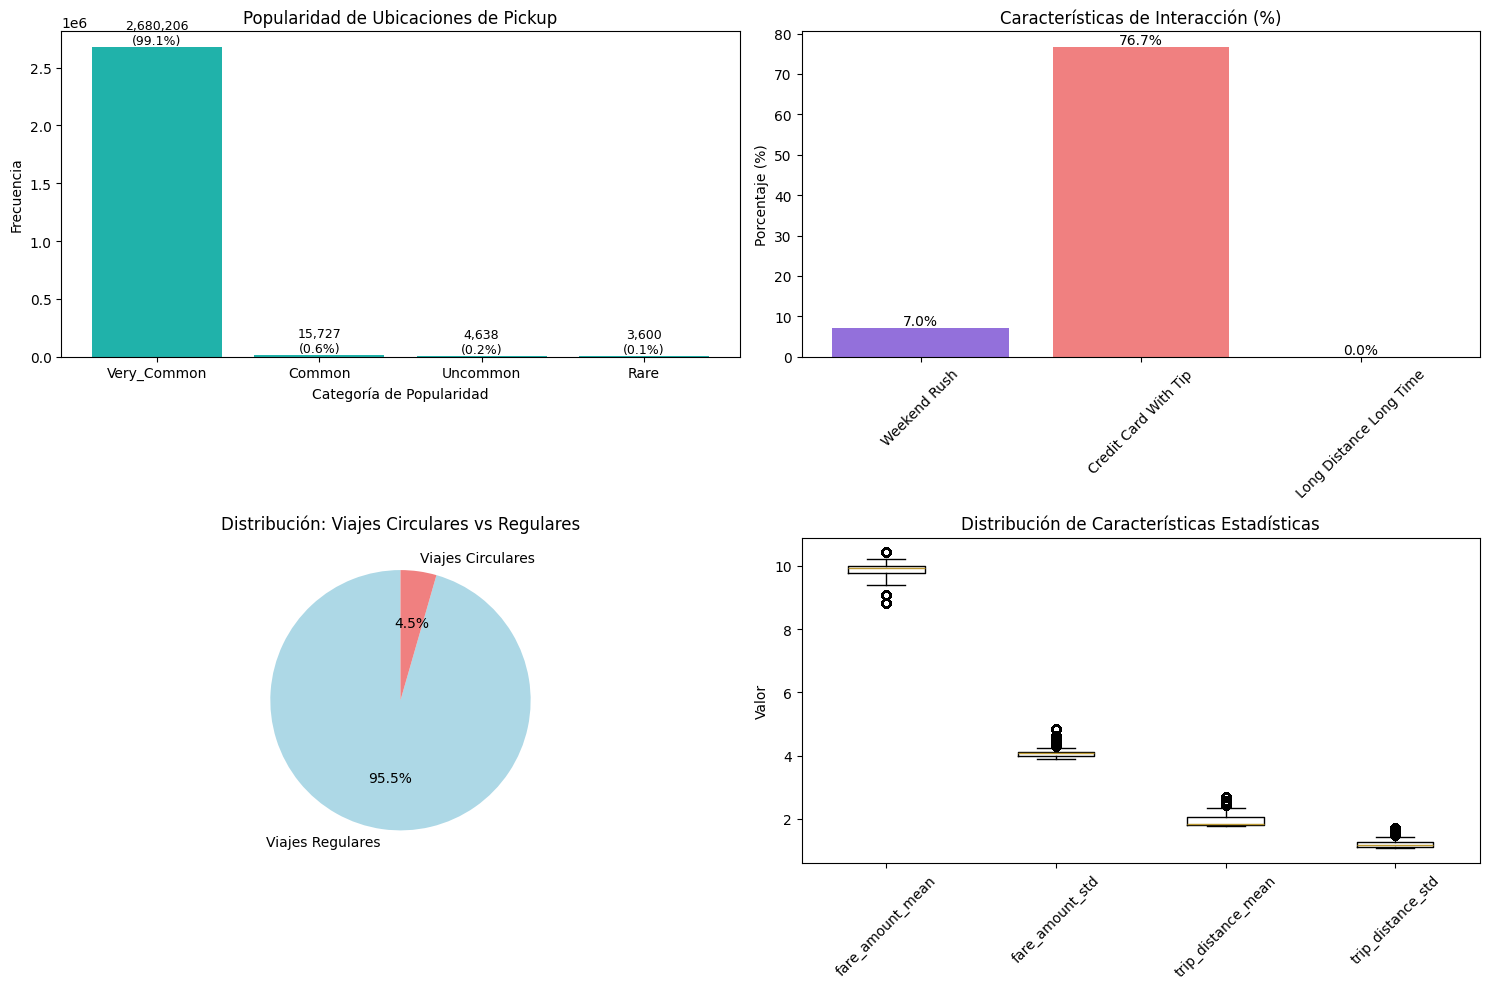


📊 ANÁLISIS DE CARACTERÍSTICAS ADICIONALES:
   Viajes circulares (mismo origen y destino): 4.46%
   Popularidad promedio de ubicaciones: 73469 viajes
   Ubicación más popular: 154010 viajes

   Características de interacción:
      Weekend Rush: 7.0%
      Credit Card With Tip: 76.7%
      Long Distance Long Time: 0.0%

   Características estadísticas creadas: 8
   Ejemplos: ['hourly_fare_amount_mean', 'hourly_fare_amount_std', 'hourly_trip_distance_mean']

   Variables codificadas: 12
      Variables dummy (one-hot): 7
      Variables ordinales codificadas: 5


In [9]:
# Ejecutar las etapas restantes del pipeline de características
print("🔧 EJECUTANDO ETAPAS RESTANTES DEL PIPELINE")
print("="*60)

# Obtener número de columnas antes de las etapas restantes
initial_cols = len(feature_engineer.df.columns)
print(f"\n📊 Columnas antes de etapas restantes: {initial_cols}")

# Etapa 6: Características de Ubicación
print("\n📍 Etapa 6: Características de Ubicación...")
location_data = feature_engineer.create_location_features()

# Etapa 7: Características de Interacción
print("🔗 Etapa 7: Características de Interacción...")
interaction_data = feature_engineer.create_interaction_features()

# Etapa 8: Características Estadísticas
print("📊 Etapa 8: Características Estadísticas...")
statistical_data = feature_engineer.create_statistical_features()

# Etapa 9: Encoding Categórico
print("🔢 Etapa 9: Encoding de Variables Categóricas...")
encoded_data = feature_engineer.encode_categorical_variables()

# Estadísticas finales
final_cols = len(feature_engineer.df.columns)
new_cols = final_cols - initial_cols

print(f"\n✅ ETAPAS RESTANTES COMPLETADAS:")
print(f"   Columnas agregadas en etapas 6-9: {new_cols}")
print(f"   Total de columnas final: {final_cols}")

# Resumen de nuevas características por categoría
location_features = [col for col in feature_engineer.df.columns 
                    if any(keyword in col.lower() for keyword in 
                          ['round_trip', 'route_id', 'popularity'])]

interaction_features = [col for col in feature_engineer.df.columns 
                       if any(keyword in col.lower() for keyword in 
                             ['weekend_rush', 'credit_card_with_tip', 'long_distance_long_time', 
                              'airport_morning', 'airport_evening'])]

statistical_features = [col for col in feature_engineer.df.columns 
                       if any(keyword in col.lower() for keyword in 
                             ['hourly_', 'daily_avg_'])]

encoded_features = [col for col in feature_engineer.df.columns 
                   if any(keyword in col for keyword in 
                         ['_encoded', 'time_of_day_', 'vendor_name_', 'payment_name_'])]

print(f"\n🔍 NUEVAS CARACTERÍSTICAS POR CATEGORÍA:")
print(f"   📍 Ubicación ({len(location_features)}): {location_features[:3]}{'...' if len(location_features) > 3 else ''}")
print(f"   🔗 Interacción ({len(interaction_features)}): {interaction_features[:3]}{'...' if len(interaction_features) > 3 else ''}")
print(f"   📊 Estadísticas ({len(statistical_features)}): {statistical_features[:3]}{'...' if len(statistical_features) > 3 else ''}")
print(f"   🔢 Encoding ({len(encoded_features)}): {encoded_features[:3]}{'...' if len(encoded_features) > 3 else ''}")

# Visualización de características de ubicación e interacción
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Popularidad de ubicaciones de pickup
if 'pickup_popularity_category' in feature_engineer.df.columns:
    pop_counts = feature_engineer.df['pickup_popularity_category'].value_counts()
    axes[0,0].bar(range(len(pop_counts)), pop_counts.values, color='lightseagreen')
    axes[0,0].set_title('Popularidad de Ubicaciones de Pickup')
    axes[0,0].set_xlabel('Categoría de Popularidad')
    axes[0,0].set_ylabel('Frecuencia')
    axes[0,0].set_xticks(range(len(pop_counts)))
    axes[0,0].set_xticklabels(pop_counts.index)
    
    for i, v in enumerate(pop_counts.values):
        pct = (v / pop_counts.sum()) * 100
        axes[0,0].text(i, v, f'{v:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)

# 2. Características de interacción
interaction_cols = ['weekend_rush', 'credit_card_with_tip', 'long_distance_long_time']
existing_interactions = [col for col in interaction_cols if col in feature_engineer.df.columns]

if existing_interactions:
    interaction_percentages = [feature_engineer.df[col].mean() * 100 for col in existing_interactions]
    labels = [col.replace('_', ' ').title() for col in existing_interactions]
    colors = ['mediumpurple', 'lightcoral', 'gold'][:len(existing_interactions)]
    
    bars = axes[0,1].bar(labels, interaction_percentages, color=colors)
    axes[0,1].set_title('Características de Interacción (%)')
    axes[0,1].set_ylabel('Porcentaje (%)')
    axes[0,1].set_xticklabels(labels, rotation=45)
    
    for bar, pct in zip(bars, interaction_percentages):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                      f'{pct:.1f}%', ha='center', va='bottom')

# 3. Distribución de viajes circulares
if 'is_round_trip' in feature_engineer.df.columns:
    round_trip_pct = feature_engineer.df['is_round_trip'].mean() * 100
    regular_trip_pct = 100 - round_trip_pct
    
    axes[1,0].pie([regular_trip_pct, round_trip_pct], 
                 labels=['Viajes Regulares', 'Viajes Circulares'],
                 colors=['lightblue', 'lightcoral'],
                 autopct='%1.1f%%',
                 startangle=90)
    axes[1,0].set_title('Distribución: Viajes Circulares vs Regulares')

# 4. Muestra de características estadísticas
if statistical_features:
    # Seleccionar algunas características estadísticas para mostrar
    sample_stats = statistical_features[:4] if len(statistical_features) >= 4 else statistical_features
    
    if sample_stats and all(col in feature_engineer.df.columns for col in sample_stats):
        stats_data = [feature_engineer.df[col] for col in sample_stats]
        axes[1,1].boxplot(stats_data, labels=[col.replace('hourly_', '').replace('daily_avg_', '') for col in sample_stats])
        axes[1,1].set_title('Distribución de Características Estadísticas')
        axes[1,1].set_ylabel('Valor')
        axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Análisis detallado de las nuevas características
print(f"\n📊 ANÁLISIS DE CARACTERÍSTICAS ADICIONALES:")

# Análisis de ubicaciones
if 'is_round_trip' in feature_engineer.df.columns:
    round_trip_pct = feature_engineer.df['is_round_trip'].mean() * 100
    print(f"   Viajes circulares (mismo origen y destino): {round_trip_pct:.2f}%")

if 'pickup_popularity' in feature_engineer.df.columns:
    pop_stats = feature_engineer.df['pickup_popularity'].describe()
    print(f"   Popularidad promedio de ubicaciones: {pop_stats['mean']:.0f} viajes")
    print(f"   Ubicación más popular: {pop_stats['max']:.0f} viajes")

# Análisis de interacciones
if existing_interactions:
    print(f"\n   Características de interacción:")
    for col in existing_interactions:
        pct = feature_engineer.df[col].mean() * 100
        description = col.replace('_', ' ').title()
        print(f"      {description}: {pct:.1f}%")

# Análisis de características estadísticas
if statistical_features:
    print(f"\n   Características estadísticas creadas: {len(statistical_features)}")
    print(f"   Ejemplos: {statistical_features[:3]}")

# Análisis de encoding
if encoded_features:
    print(f"\n   Variables codificadas: {len(encoded_features)}")
    
    # Contar variables dummy creadas
    dummy_features = [col for col in encoded_features if any(prefix in col for prefix in ['time_of_day_', 'vendor_name_', 'payment_name_'])]
    ordinal_features = [col for col in encoded_features if '_encoded' in col]
    
    print(f"      Variables dummy (one-hot): {len(dummy_features)}")
    print(f"      Variables ordinales codificadas: {len(ordinal_features)}")

## 10. Resumen Final y Validación de Características

📋 RESUMEN COMPLETO DE INGENIERÍA DE CARACTERÍSTICAS

📊 ESTADÍSTICAS GENERALES:
   Total de características: 110
   Variables numéricas: 69
   Variables categóricas: 20
   Variables datetime: 2
   Indicadores binarios: 31
   Tamaño del dataset: (2704171, 110)
   Memoria utilizada: 2517.72 MB

🔍 ANÁLISIS POR TIPO DE VARIABLE:
   Variables continuas: 38
   Top variables continuas:
       1. VendorID                  - Rango: 1.00
       2. passenger_count           - Rango: 5.00
       3. trip_distance             - Rango: 7.42
       4. RatecodeID                - Rango: 98.00
       5. PULocationID              - Rango: 264.00
       6. DOLocationID              - Rango: 264.00
       7. payment_type              - Rango: 3.00
       8. fare_amount               - Rango: 23.19
       9. extra                     - Rango: 8.30
      10. mta_tax                   - Rango: 3.30

   Indicadores binarios más frecuentes:
       1. is_standard_rate          - 99.9%
       2. is_credit_card    

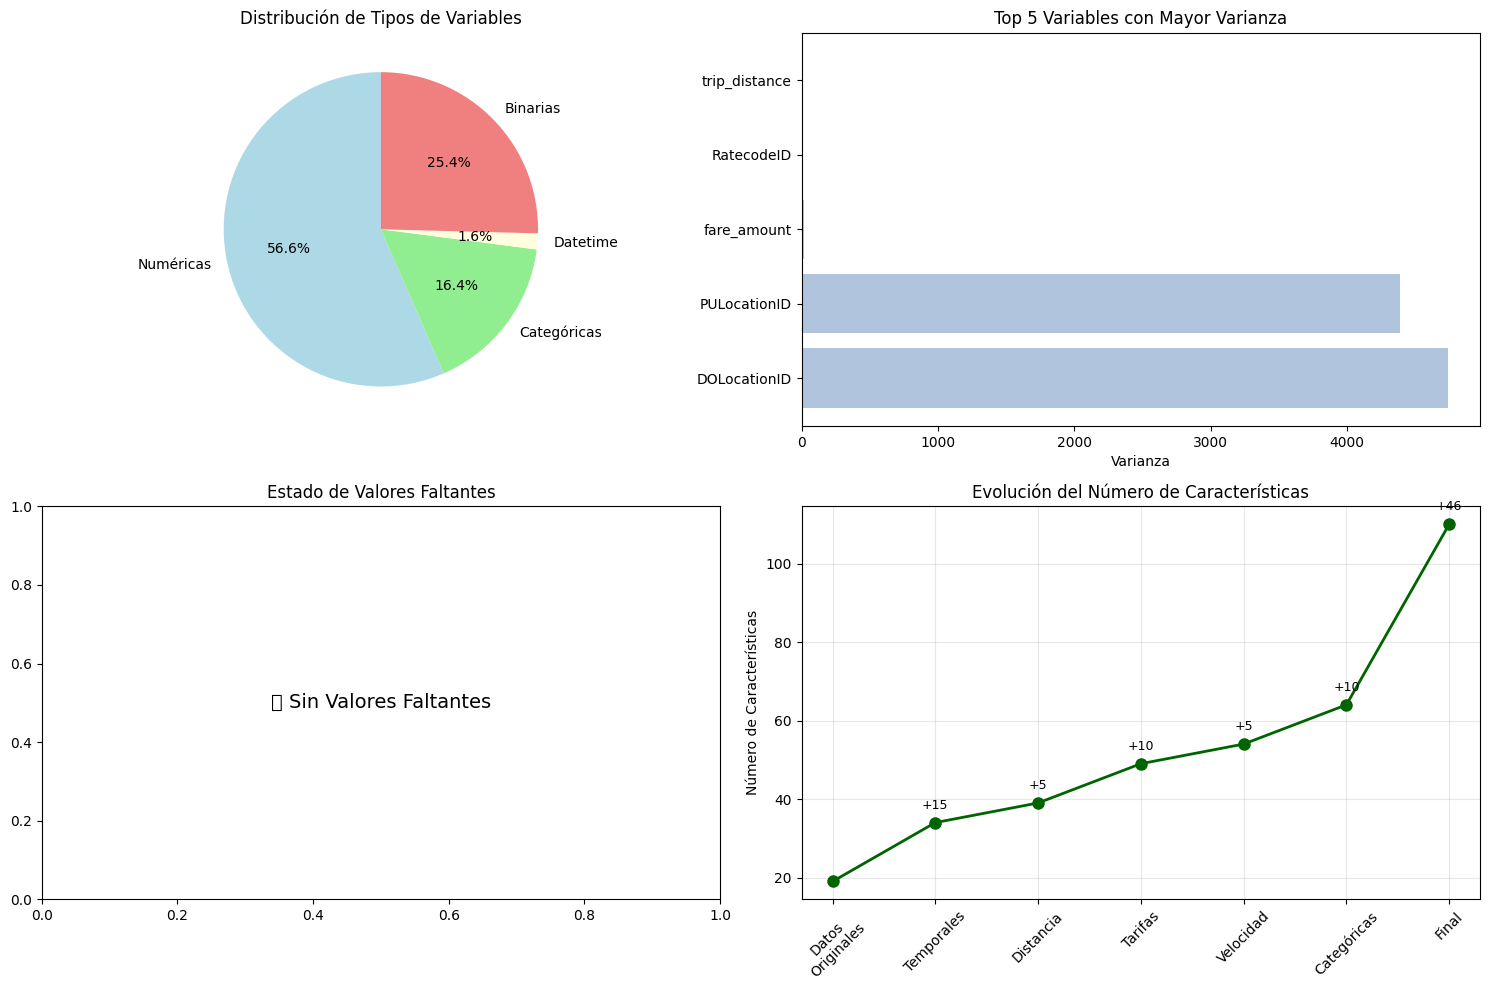


🔍 VALIDACIÓN DE CALIDAD DE DATOS:
   Columnas con valores infinitos: 0
   Registros duplicados: 0
   Columnas constantes (sin variación): 5
      ['pickup_month', 'is_long_trip', 'is_long_distance', 'is_jfk_trip', 'long_distance_long_time']

🎯 CARACTERÍSTICAS POR CATEGORÍA TEMÁTICA:
   Temporales  :  30 características
   Geográficas :   7 características
   Monetarias  :  20 características
   Operacionales:  16 características
   Categóricas :  22 características
   Interacción :   3 características
   Estadísticas:   8 características
   Encoding    :  13 características

✅ PIPELINE DE INGENIERÍA DE CARACTERÍSTICAS COMPLETADO

📈 MEJORAS LOGRADAS:
   • Dataset original: ~19 columnas
   • Dataset enriquecido: 110 características
   • Incremento: 91 nuevas características
   • 31 indicadores binarios para patrones específicos
   • 38 variables continuas para modelado
   • Encoding completo para variables categóricas


In [10]:
# Generar resumen completo de características
print("📋 RESUMEN COMPLETO DE INGENIERÍA DE CARACTERÍSTICAS")
print("="*70)

# Crear resumen usando el método de la clase
summary = feature_engineer.create_feature_summary()

print(f"\n📊 ESTADÍSTICAS GENERALES:")
print(f"   Total de características: {summary['total_columns']}")
print(f"   Variables numéricas: {summary['numeric_columns']}")
print(f"   Variables categóricas: {summary['categorical_columns']}")
print(f"   Variables datetime: {summary['datetime_columns']}")
print(f"   Indicadores binarios: {summary['binary_indicators']}")
print(f"   Tamaño del dataset: {summary['data_shape']}")
print(f"   Memoria utilizada: {summary['memory_usage_mb']:.2f} MB")

print(f"\n🔍 ANÁLISIS POR TIPO DE VARIABLE:")

# Análisis de variables numéricas
numeric_cols = summary['column_types']['numeric']
continuous_vars = [col for col in numeric_cols if not set(feature_engineer.df[col].dropna().unique()).issubset({0, 1})]
print(f"   Variables continuas: {len(continuous_vars)}")

# Top 10 variables continuas más importantes
if continuous_vars:
    print(f"   Top variables continuas:")
    for i, col in enumerate(continuous_vars[:10], 1):
        var_range = feature_engineer.df[col].max() - feature_engineer.df[col].min()
        print(f"      {i:2d}. {col:<25} - Rango: {var_range:.2f}")

# Análisis de indicadores binarios
binary_cols = summary['column_types']['binary_indicators']
if binary_cols:
    print(f"\n   Indicadores binarios más frecuentes:")
    binary_percentages = [(col, feature_engineer.df[col].mean() * 100) for col in binary_cols]
    binary_percentages.sort(key=lambda x: x[1], reverse=True)
    
    for i, (col, pct) in enumerate(binary_percentages[:10], 1):
        print(f"      {i:2d}. {col:<25} - {pct:.1f}%")

# Análisis de variables categóricas
categorical_cols = summary['column_types']['categorical']
if categorical_cols:
    print(f"\n   Variables categóricas:")
    for col in categorical_cols[:5]:
        unique_count = feature_engineer.df[col].nunique()
        print(f"      {col:<25} - {unique_count} categorías únicas")

# Visualización del resumen
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Distribución de tipos de variables
type_counts = [summary['numeric_columns'], summary['categorical_columns'], 
               summary['datetime_columns'], summary['binary_indicators']]
type_labels = ['Numéricas', 'Categóricas', 'Datetime', 'Binarias']
colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral']

axes[0,0].pie(type_counts, labels=type_labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribución de Tipos de Variables')

# 2. Top 10 variables con mayor varianza (para numéricas continuas)
if len(continuous_vars) >= 5:
    variance_data = [(col, feature_engineer.df[col].var()) for col in continuous_vars[:10]]
    variance_data.sort(key=lambda x: x[1], reverse=True)
    
    vars_names = [item[0] for item in variance_data[:5]]
    vars_variance = [item[1] for item in variance_data[:5]]
    
    axes[0,1].barh(vars_names, vars_variance, color='lightsteelblue')
    axes[0,1].set_title('Top 5 Variables con Mayor Varianza')
    axes[0,1].set_xlabel('Varianza')

# 3. Distribución de valores faltantes
missing_counts = feature_engineer.df.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]

if len(missing_cols) > 0:
    top_missing = missing_cols.head(10)
    axes[1,0].barh(range(len(top_missing)), top_missing.values, color='salmon')
    axes[1,0].set_title('Top Variables con Valores Faltantes')
    axes[1,0].set_xlabel('Número de Valores Faltantes')
    axes[1,0].set_yticks(range(len(top_missing)))
    axes[1,0].set_yticklabels(top_missing.index)
else:
    axes[1,0].text(0.5, 0.5, '✅ Sin Valores Faltantes', 
                  ha='center', va='center', transform=axes[1,0].transAxes, fontsize=14)
    axes[1,0].set_title('Estado de Valores Faltantes')

# 4. Evolución del número de características
stages = ['Datos\nOriginales', 'Temporales', 'Distancia', 'Tarifas', 'Velocidad', 'Categóricas', 'Final']
# Simular evolución (en producción esto se capturaría en cada etapa)
original_cols = 19  # Aproximado según estructura típica
stage_cols = [original_cols, original_cols + 15, original_cols + 20, 
              original_cols + 30, original_cols + 35, original_cols + 45, summary['total_columns']]

axes[1,1].plot(stages, stage_cols, marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[1,1].set_title('Evolución del Número de Características')
axes[1,1].set_ylabel('Número de Características')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

# Agregar anotaciones
for i, (stage, cols) in enumerate(zip(stages, stage_cols)):
    if i > 0:  # No anotar el primer punto
        added = cols - stage_cols[i-1]
        axes[1,1].annotate(f'+{added}', (i, cols), textcoords="offset points", 
                          xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Validación de calidad de datos
print(f"\n🔍 VALIDACIÓN DE CALIDAD DE DATOS:")

# Verificar valores infinitos
inf_cols = []
for col in feature_engineer.df.select_dtypes(include=[np.number]).columns:
    if np.isinf(feature_engineer.df[col]).any():
        inf_cols.append(col)

print(f"   Columnas con valores infinitos: {len(inf_cols)}")
if inf_cols:
    print(f"      {inf_cols[:5]}{'...' if len(inf_cols) > 5 else ''}")

# Verificar duplicados
duplicates = feature_engineer.df.duplicated().sum()
print(f"   Registros duplicados: {duplicates:,}")

# Verificar columnas constantes
constant_cols = []
for col in feature_engineer.df.columns:
    nunique_count = feature_engineer.df[col].nunique()
    if type(nunique_count) is pd.Series:
        nunique_count = nunique_count.iloc[0]
    if nunique_count <= 1:
        constant_cols.append(col)

print(f"   Columnas constantes (sin variación): {len(constant_cols)}")
if constant_cols:
    print(f"      {constant_cols}")

# Resumen de características por categoría temática
print(f"\n🎯 CARACTERÍSTICAS POR CATEGORÍA TEMÁTICA:")

feature_categories = {
    'Temporales': ['hour', 'day', 'weekend', 'rush', 'time', 'duration'],
    'Geográficas': ['location', 'route', 'popularity', 'round_trip'],
    'Monetarias': ['fare', 'tip', 'total', 'amount'],
    'Operacionales': ['speed', 'distance', 'efficiency'],
    'Categóricas': ['vendor', 'ratecode', 'payment', 'passenger'],
    'Interacción': ['weekend_rush', 'credit_card_with_tip', 'airport_morning'],
    'Estadísticas': ['hourly_', 'daily_avg_'],
    'Encoding': ['_encoded', '_Morning', '_Evening']
}

for category, keywords in feature_categories.items():
    matching_cols = [col for col in feature_engineer.df.columns 
                    if any(keyword.lower() in col.lower() for keyword in keywords)]
    print(f"   {category:<12}: {len(matching_cols):3d} características")

print(f"\n✅ PIPELINE DE INGENIERÍA DE CARACTERÍSTICAS COMPLETADO")
print(f"\n📈 MEJORAS LOGRADAS:")
print(f"   • Dataset original: ~19 columnas")
print(f"   • Dataset enriquecido: {summary['total_columns']} características")
print(f"   • Incremento: {summary['total_columns'] - 19} nuevas características")
print(f"   • {summary['binary_indicators']} indicadores binarios para patrones específicos")
print(f"   • {len(continuous_vars)} variables continuas para modelado")
print(f"   • Encoding completo para variables categóricas")

## 11. Guardado del Dataset con Características

In [11]:
# Guardar el dataset con características para ML
print("💾 GUARDANDO DATASET CON CARACTERÍSTICAS")
print("="*60)

try:
    # Guardar usando el método de la clase
    output_path = feature_engineer.save_feature_data()
    
    print(f"\n✅ DATASET CON CARACTERÍSTICAS GUARDADO:")
    print(f"   Archivo: {output_path}")
    
    # Verificar el archivo guardado
    if Path(output_path).exists():
        file_size = Path(output_path).stat().st_size / 1024**2
        print(f"   Tamaño: {file_size:.2f} MB")
        print(f"   Formato: Parquet comprimido (gzip)")
        
        # Verificar carga del archivo guardado
        test_load = pd.read_parquet(output_path)
        print(f"   Verificación de carga: ✅ {test_load.shape[0]:,} registros, {test_load.shape[1]} características")
        
        # Verificar tipos de datos
        numeric_test = test_load.select_dtypes(include=[np.number]).shape[1]
        categorical_test = test_load.select_dtypes(include=['object', 'category']).shape[1]
        
        print(f"\n📊 VERIFICACIÓN DE TIPOS DE DATOS:")
        print(f"   Variables numéricas: {numeric_test}")
        print(f"   Variables categóricas: {categorical_test}")
        print(f"   Total características: {test_load.shape[1]}")
        
        # Mostrar muestra de las primeras características
        print(f"\n🔍 MUESTRA DE CARACTERÍSTICAS (primeras 10):")
        sample_cols = test_load.columns[:10].tolist()
        for i, col in enumerate(sample_cols, 1):
            dtype = test_load[col].dtype
            unique_count = test_load[col].nunique()
            print(f"   {i:2d}. {col:<25} ({dtype}) - {unique_count} valores únicos")
        
        print(f"\n📈 ESTADÍSTICAS DEL DATASET FINAL:")
        print(f"   Registros: {test_load.shape[0]:,}")
        print(f"   Características: {test_load.shape[1]}")
        print(f"   Densidad de datos: {((test_load.notna().sum().sum()) / (test_load.shape[0] * test_load.shape[1]) * 100):.1f}%")
        
        # Limpiar memoria
        del test_load
        
    else:
        print(f"   ❌ Error: Archivo no encontrado después del guardado")
        
except Exception as e:
    print(f"❌ ERROR AL GUARDAR DATASET:")
    print(f"   {str(e)}")
    print(f"   Verifique permisos de escritura y espacio en disco")

# Resumen ejecutivo final
print(f"\n" + "="*70)
print(f"📋 RESUMEN EJECUTIVO - INGENIERÍA DE CARACTERÍSTICAS")
print(f"="*70)

summary = feature_engineer.create_feature_summary()

print(f"\n🎯 OBJETIVOS ALCANZADOS:")
print(f"   ✅ Transformación de datos limpios en características ML-ready")
print(f"   ✅ Creación de {summary['total_columns']} características totales")
print(f"   ✅ {summary['binary_indicators']} indicadores binarios para patrones específicos")
print(f"   ✅ Encoding completo de variables categóricas")
print(f"   ✅ Características de interacción y agregación estadística")

print(f"\n📊 TIPOS DE CARACTERÍSTICAS CREADAS:")
print(f"   🕒 Temporales: Horas pico, días de semana, categorías de tiempo")
print(f"   📏 Distancia: Categorización, transformaciones logarítmicas")
print(f"   💰 Monetarias: Ratios de propinas, tarifas por milla, categorías de monto")
print(f"   🚗 Velocidad: Velocidad promedio, eficiencia, categorías de velocidad")
print(f"   🏷️ Categóricas: Mapeos interpretativos, indicadores binarios")
print(f"   📍 Ubicación: Popularidad de zonas, viajes circulares, rutas")
print(f"   🔗 Interacción: Combinaciones de variables clave")
print(f"   📈 Estadísticas: Agregaciones por tiempo y ubicación")

print(f"\n📁 ARCHIVOS GENERADOS:")
print(f"   Entrada: {PROCESSED_DATA}")
print(f"   Salida: {FEATURE_DATA}")

print(f"\n🚀 PRÓXIMOS PASOS:")
print(f"   1. Análisis exploratorio del dataset con características")
print(f"   2. Selección de características relevantes para el modelo")
print(f"   3. División en conjuntos de entrenamiento y prueba")
print(f"   4. Entrenamiento de modelos de machine learning")
print(f"   5. Evaluación y optimización de hiperparámetros")

print(f"\n💡 CARACTERÍSTICAS CLAVE PARA MODELADO:")
key_features = [
    'tip_percentage', 'fare_per_mile', 'avg_speed_mph', 'trip_duration_minutes',
    'is_weekend', 'is_rush_hour', 'is_airport_trip', 'distance_category_encoded',
    'time_of_day_Morning', 'payment_name_Credit_Card'
]

existing_key_features = [f for f in key_features if f in feature_engineer.df.columns]
print(f"   Variables predictivas principales ({len(existing_key_features)}):")
for feature in existing_key_features[:8]:
    print(f"      • {feature}")

if len(existing_key_features) > 8:
    print(f"      ... y {len(existing_key_features) - 8} más")

print(f"\n🎉 INGENIERÍA DE CARACTERÍSTICAS COMPLETADA EXITOSAMENTE!")

💾 GUARDANDO DATASET CON CARACTERÍSTICAS


2025-11-28 19:26:54,269 - nyc_taxi_logger - INFO - Dataset con características guardado en: d:\VSCode\nyc_taxi_project\data\processed\feature_data.parquet
2025-11-28 19:26:54,271 - nyc_taxi_logger - INFO - Tamaño del archivo: 93.43 MB



✅ DATASET CON CARACTERÍSTICAS GUARDADO:
   Archivo: d:\VSCode\nyc_taxi_project\data\processed\feature_data.parquet
   Tamaño: 93.43 MB
   Formato: Parquet comprimido (gzip)
   Verificación de carga: ✅ 2,704,171 registros, 110 características

📊 VERIFICACIÓN DE TIPOS DE DATOS:
   Variables numéricas: 74
   Variables categóricas: 15
   Total características: 110

🔍 MUESTRA DE CARACTERÍSTICAS (primeras 10):
    1. VendorID                  (int64) - 2 valores únicos
    2. tpep_pickup_datetime      (datetime64[us]) - 1529509 valores únicos
    3. tpep_dropoff_datetime     (datetime64[us]) - 1528005 valores únicos
    4. passenger_count           (float64) - 6 valores únicos
    5. trip_distance             (float64) - 743 valores únicos
    6. RatecodeID                (float64) - 6 valores únicos
    7. store_and_fwd_flag        (object) - 2 valores únicos
    8. PULocationID              (int64) - 243 valores únicos
    9. DOLocationID              (int64) - 245 valores únicos
   10. p